In [18]:
import pandas as pd
import numpy as np
from taigapy import create_taiga_client_v3
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [19]:
tf_e3_corrs_fdrs = pd.read_pickle("pydata/tf_dependency_e3ls_expr_correlation_bylineage_fdr.pkl")

In [20]:
tf_e3_corrs_fdrs_filtered = tf_e3_corrs_fdrs[tf_e3_corrs_fdrs['fdr']< 0.1]

In [21]:
tf_e3_corrs_fdrs_filtered

,lineage,TF,E3_ligase,p-val,corr,fdr,log10q
61546,Biliary Tract,ZBTB4,BIRC7,4.519791e-07,-0.729343,0.078253,1.106501
133510,Biliary Tract,ZKSCAN7,MARCHF10,1.903086e-07,0.744758,0.049423,1.306070
397622,Biliary Tract,NR5A1,TRIM50,2.524961e-08,-0.776952,0.013115,1.882243
7560,Bladder/Urinary Tract,PAX8,RNF212,5.528394e-07,-0.740536,0.047857,1.320050
61964,Bladder/Urinary Tract,ZNF706,BIRC7,2.609746e-08,-0.790857,0.006778,2.168930
...,...,...,...,...,...,...,...
686320,Uterus,PATZ1,SOCS7,5.560403e-06,0.685342,0.076002,1.119175
692768,Uterus,OTX2,SPSB4,9.336810e-08,-0.763922,0.006062,2.217390
734748,Uterus,ZBTB41,TRIM58,8.355319e-06,-0.675906,0.095436,1.020286
735020,Uterus,ZNF501,TRIM58,2.142585e-06,-0.706159,0.039745,1.400718


In [22]:
tf_e3_corrs_fdrs_filtered = tf_e3_corrs_fdrs_filtered[tf_e3_corrs_fdrs_filtered['corr']< 0]

In [23]:
tf_e3_corrs_fdrs_filtered

,lineage,TF,E3_ligase,p-val,corr,fdr,log10q
61546,Biliary Tract,ZBTB4,BIRC7,4.519791e-07,-0.729343,0.078253,1.106501
397622,Biliary Tract,NR5A1,TRIM50,2.524961e-08,-0.776952,0.013115,1.882243
7560,Bladder/Urinary Tract,PAX8,RNF212,5.528394e-07,-0.740536,0.047857,1.320050
61964,Bladder/Urinary Tract,ZNF706,BIRC7,2.609746e-08,-0.790857,0.006778,2.168930
183510,Bladder/Urinary Tract,PAX8,PRKN,1.522237e-06,-0.720841,0.081630,1.088152
...,...,...,...,...,...,...,...
651683,Uterus,TSC22D1,NUP43,1.217736e-06,-0.717711,0.030119,1.521164
692768,Uterus,OTX2,SPSB4,9.336810e-08,-0.763922,0.006062,2.217390
734748,Uterus,ZBTB41,TRIM58,8.355319e-06,-0.675906,0.095436,1.020286
735020,Uterus,ZNF501,TRIM58,2.142585e-06,-0.706159,0.039745,1.400718


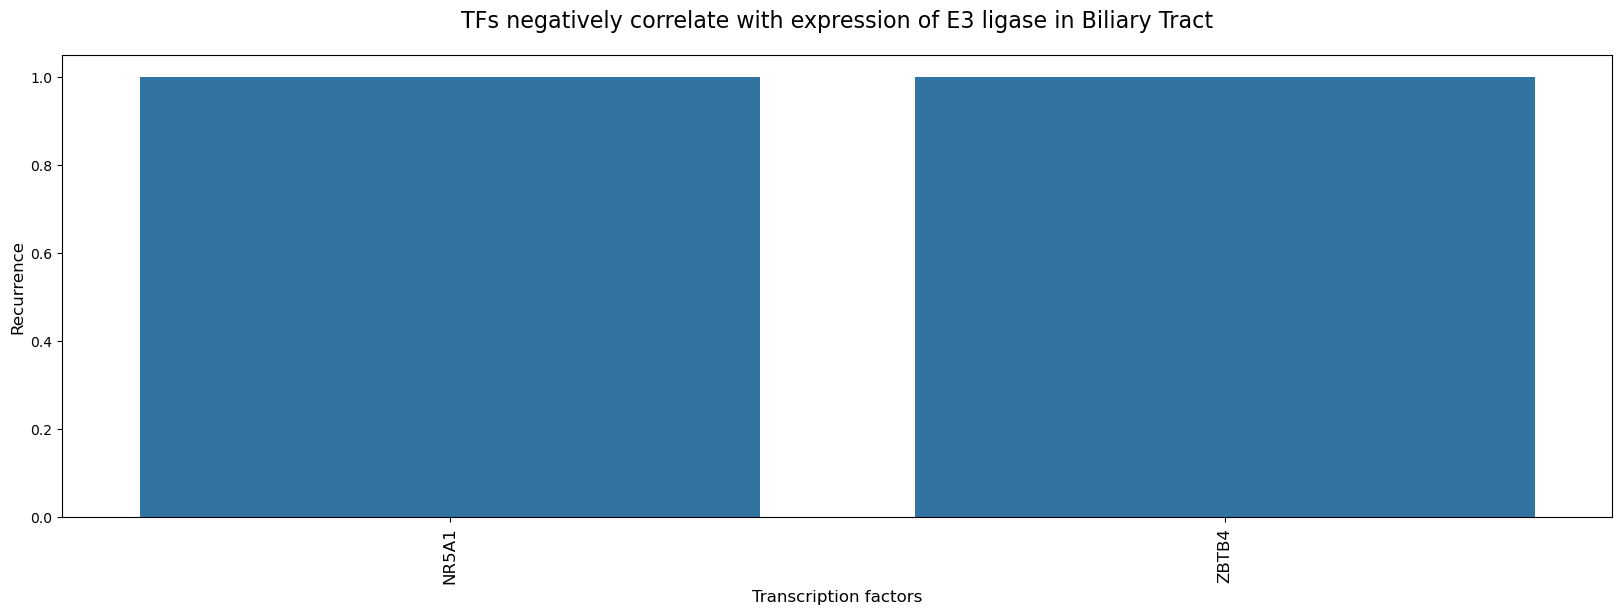

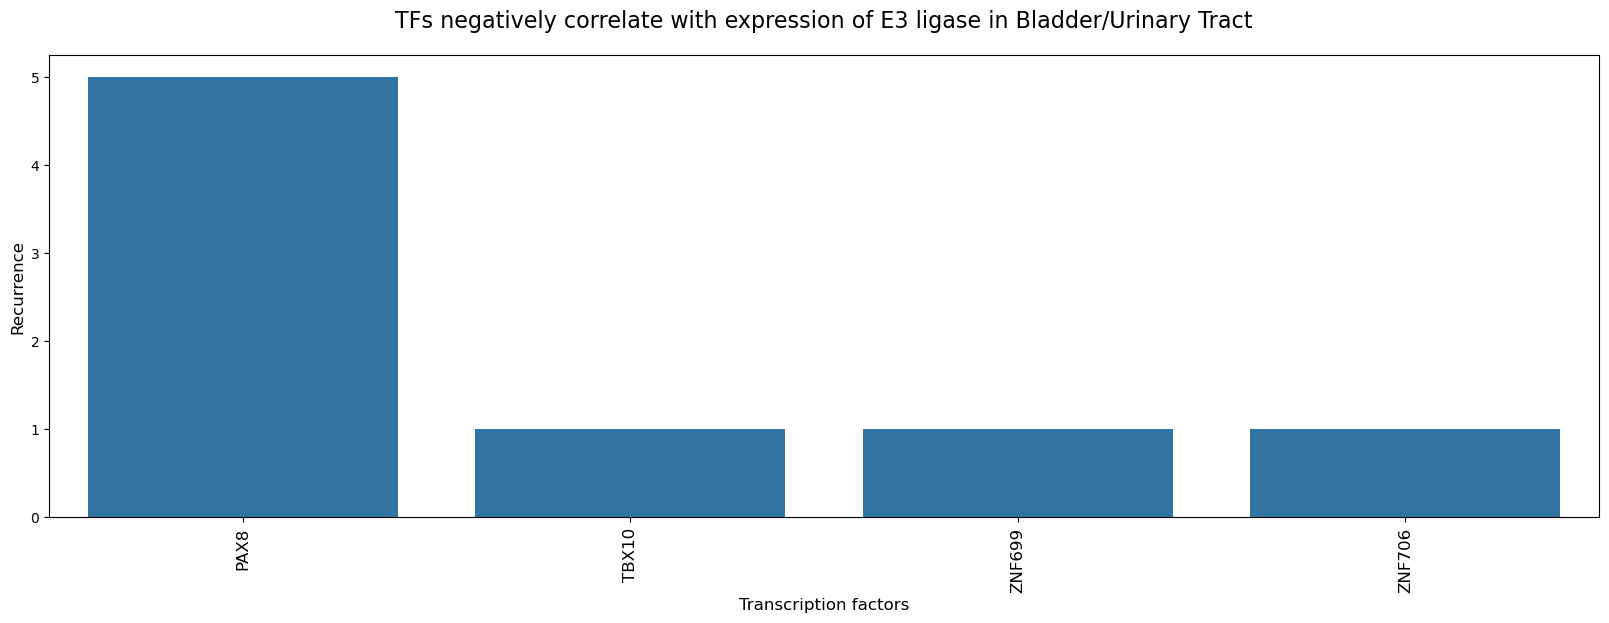

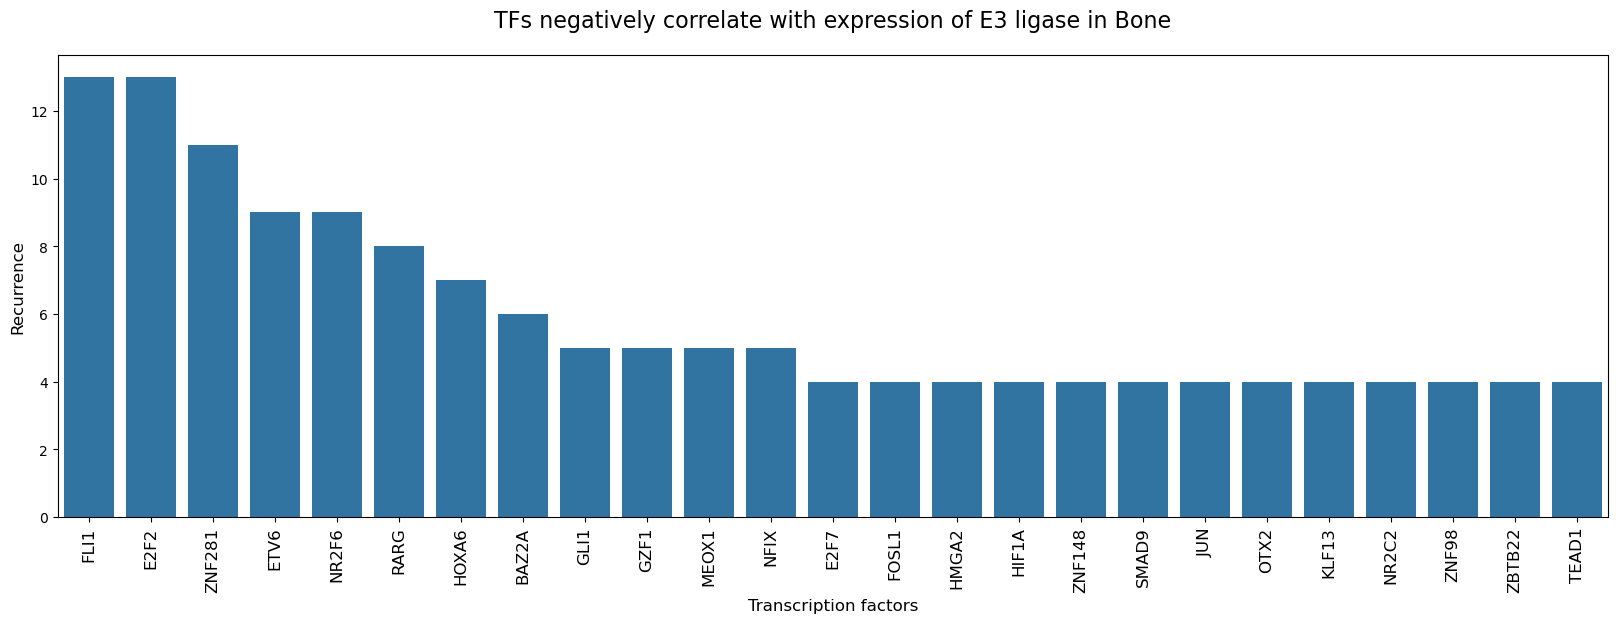

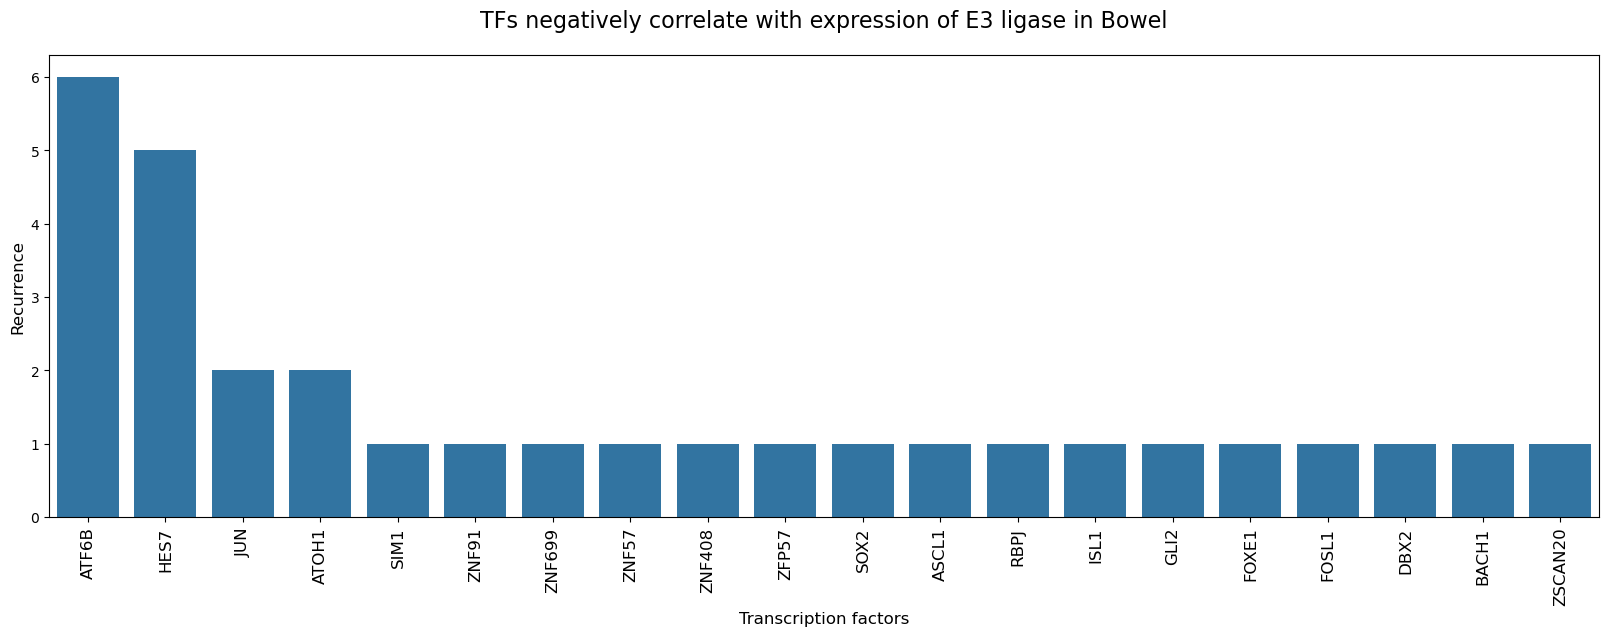

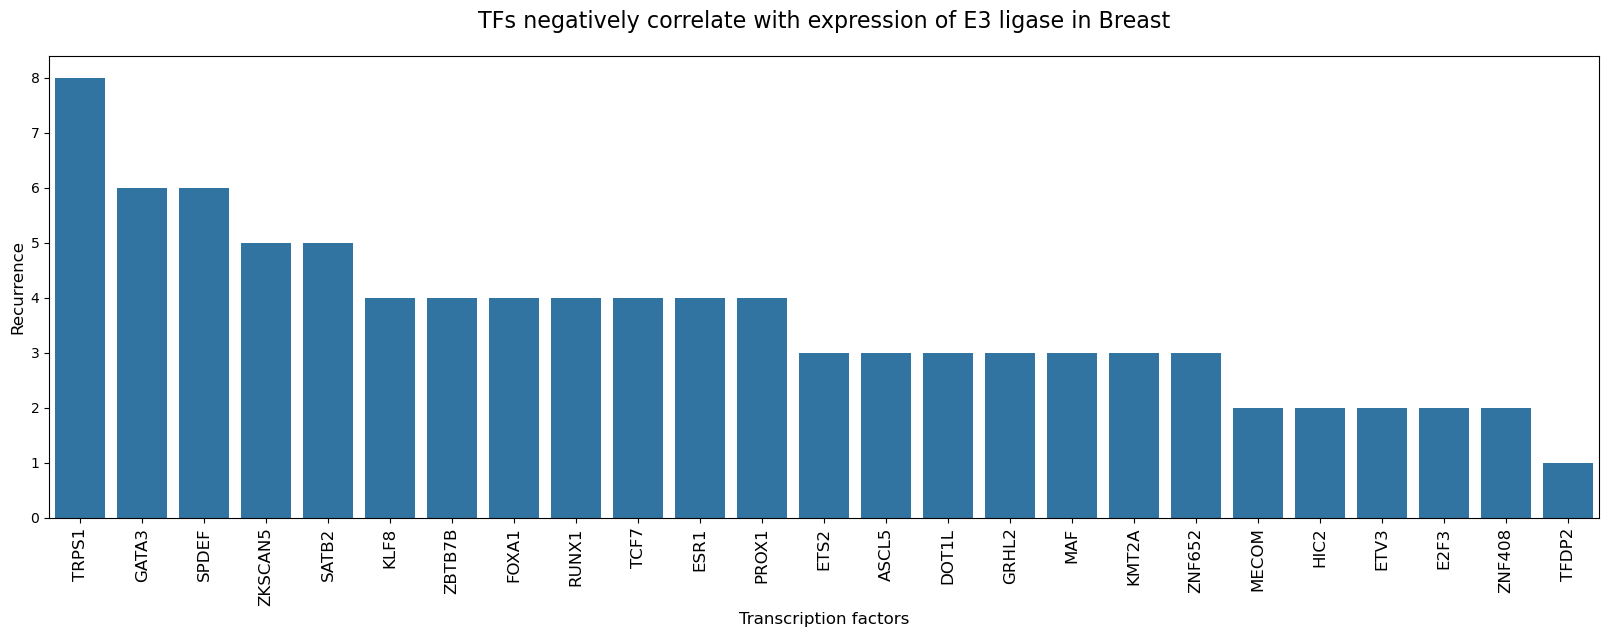

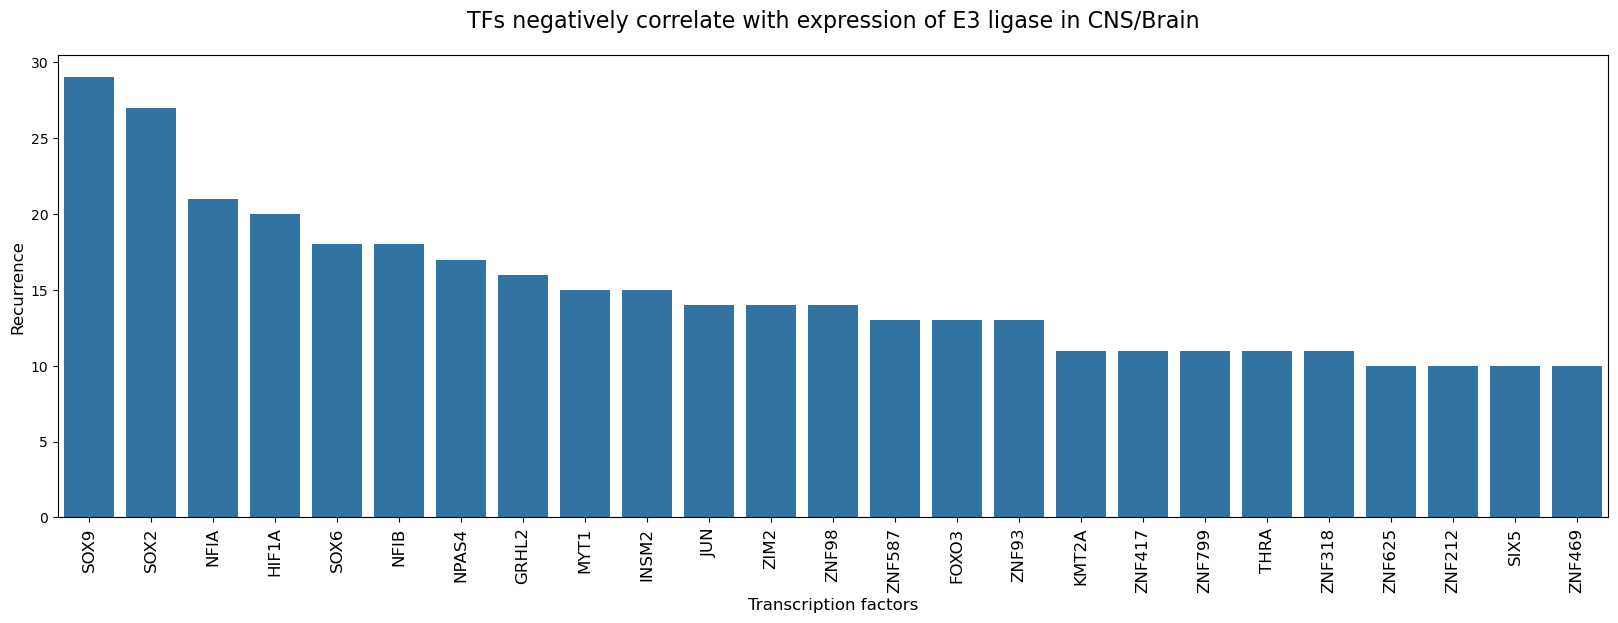

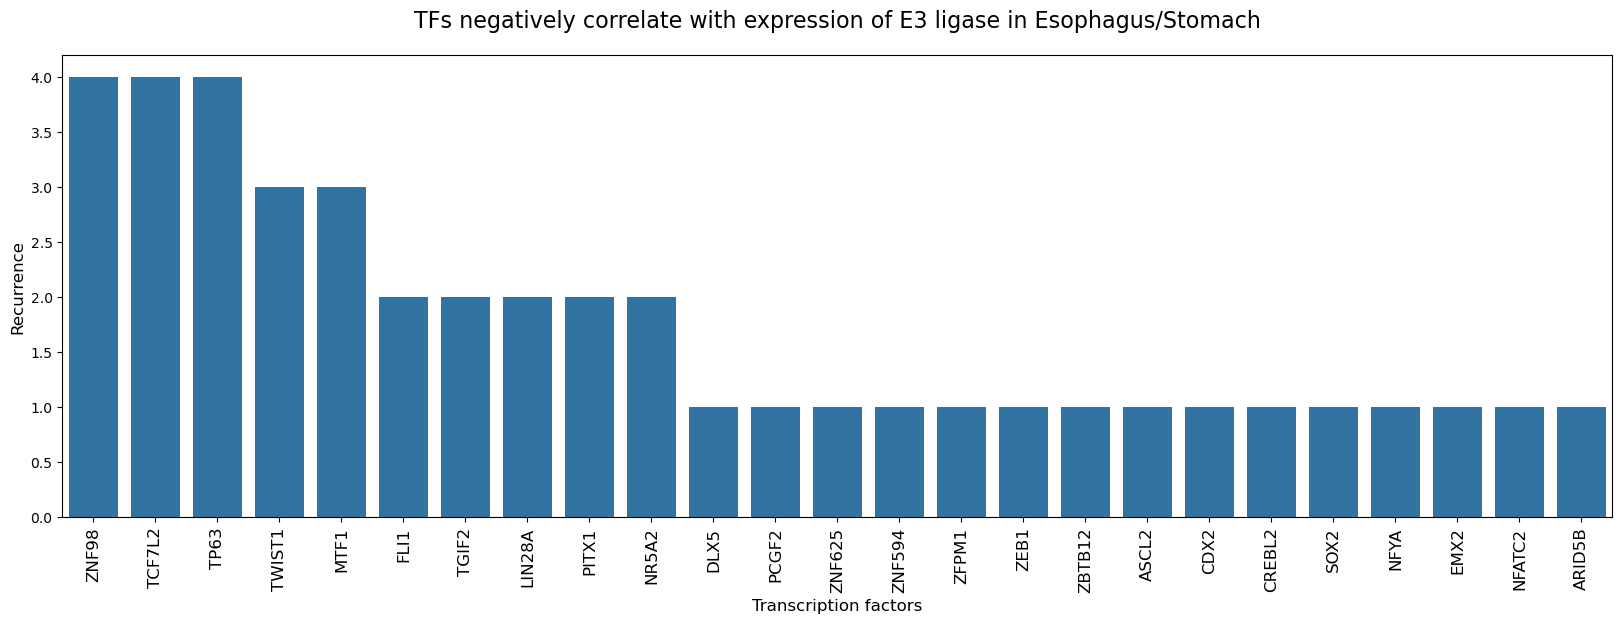

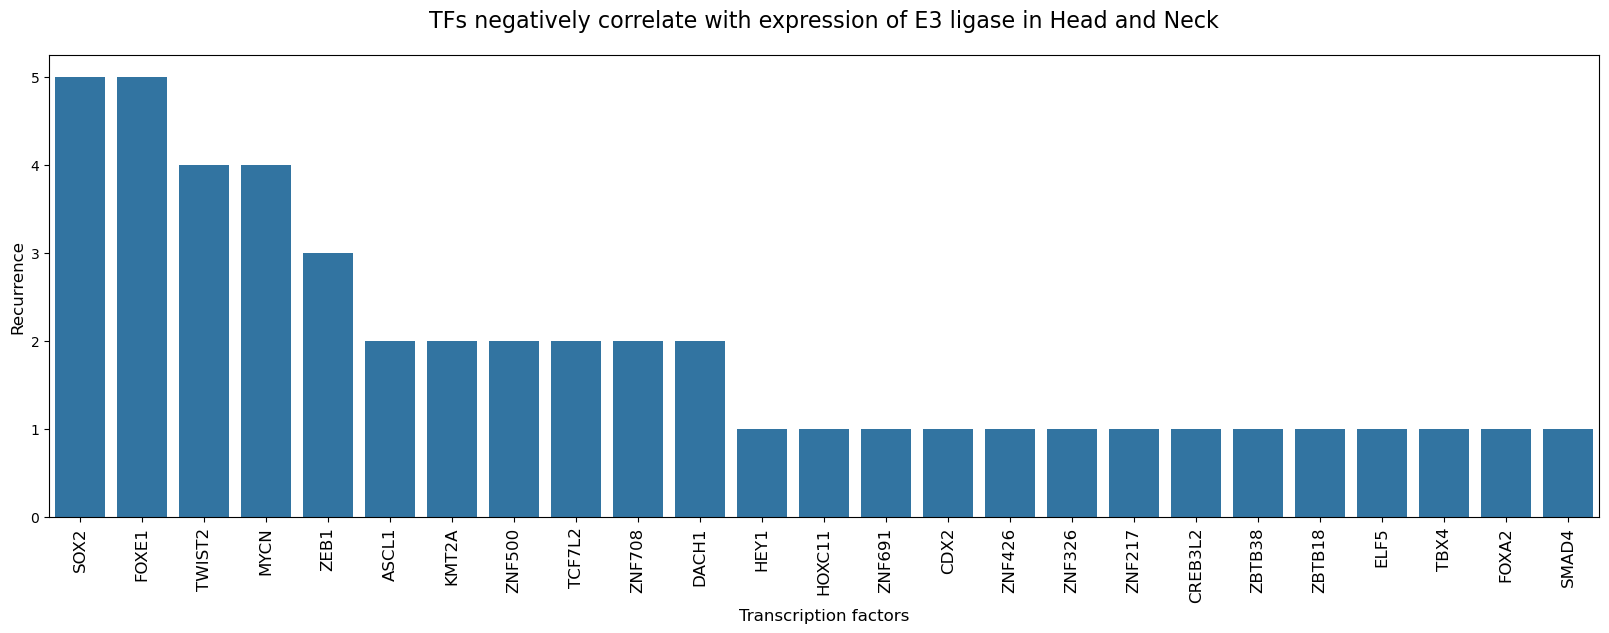

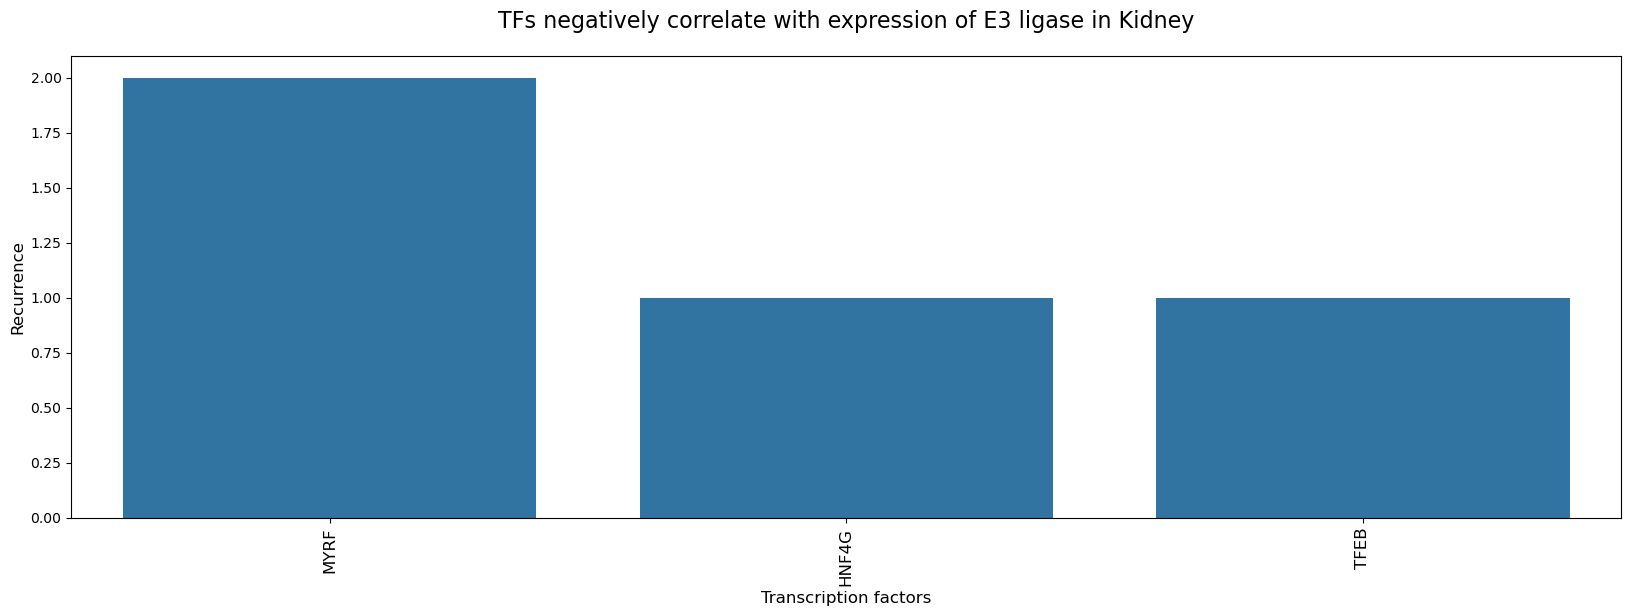

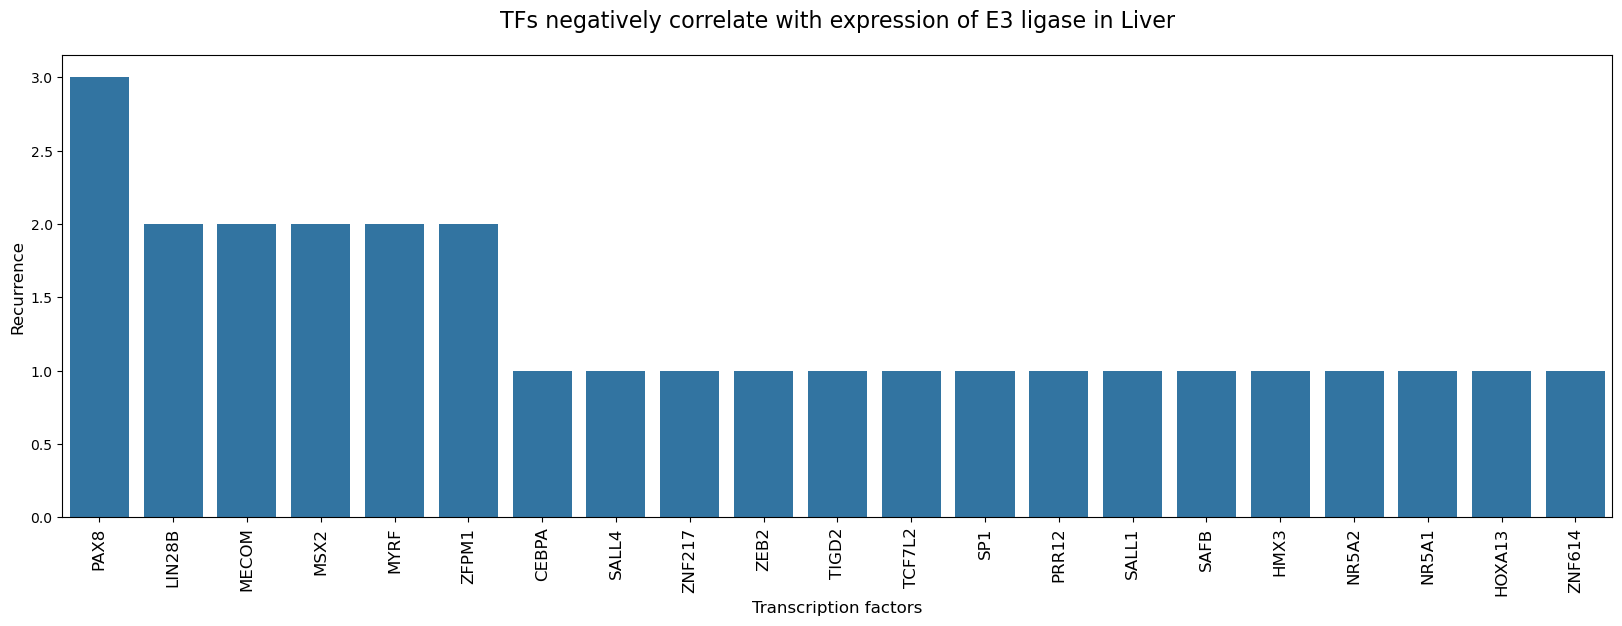

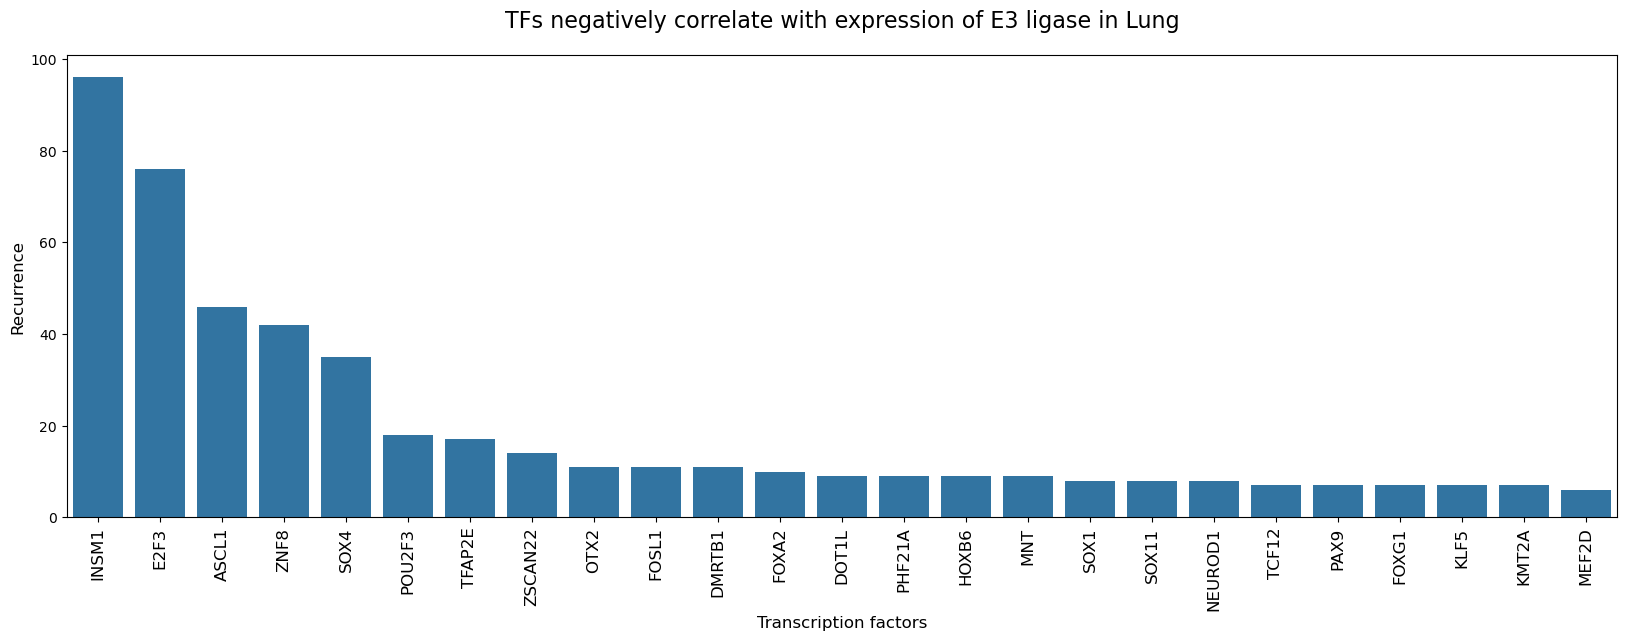

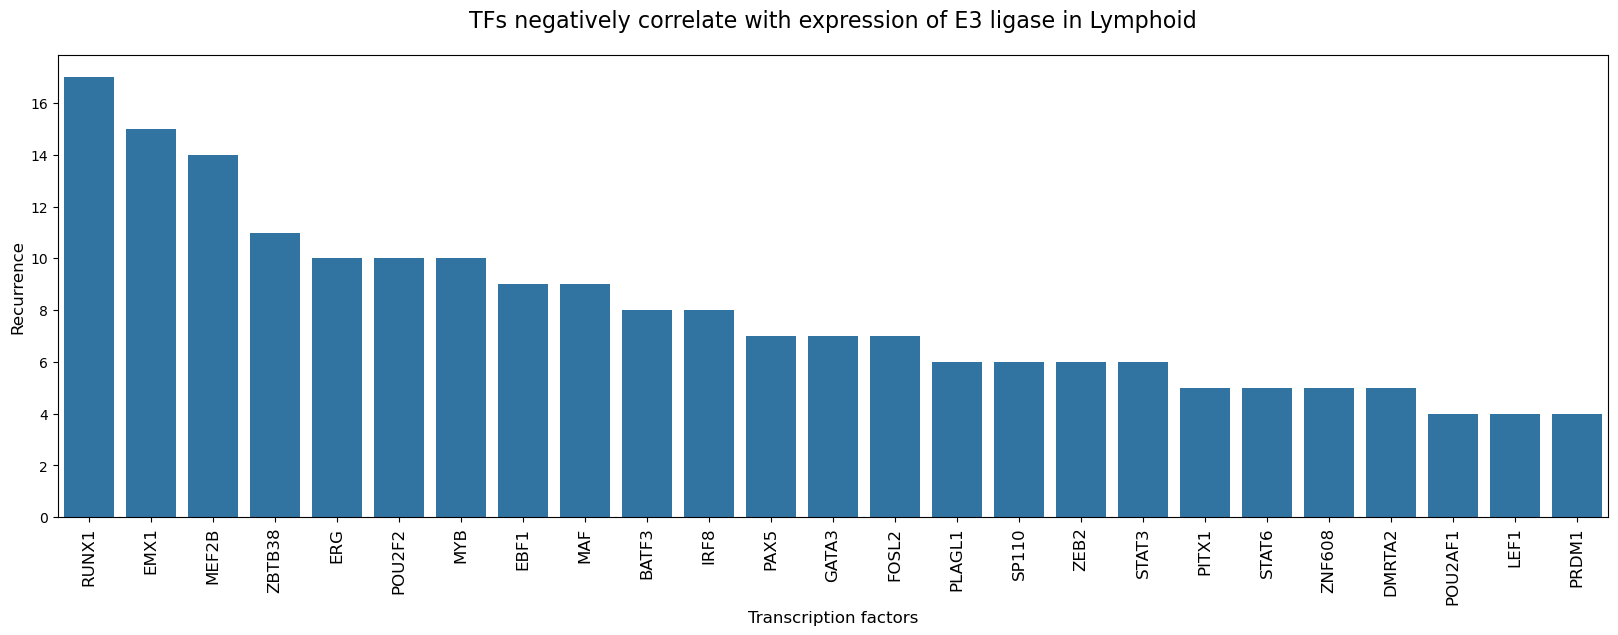

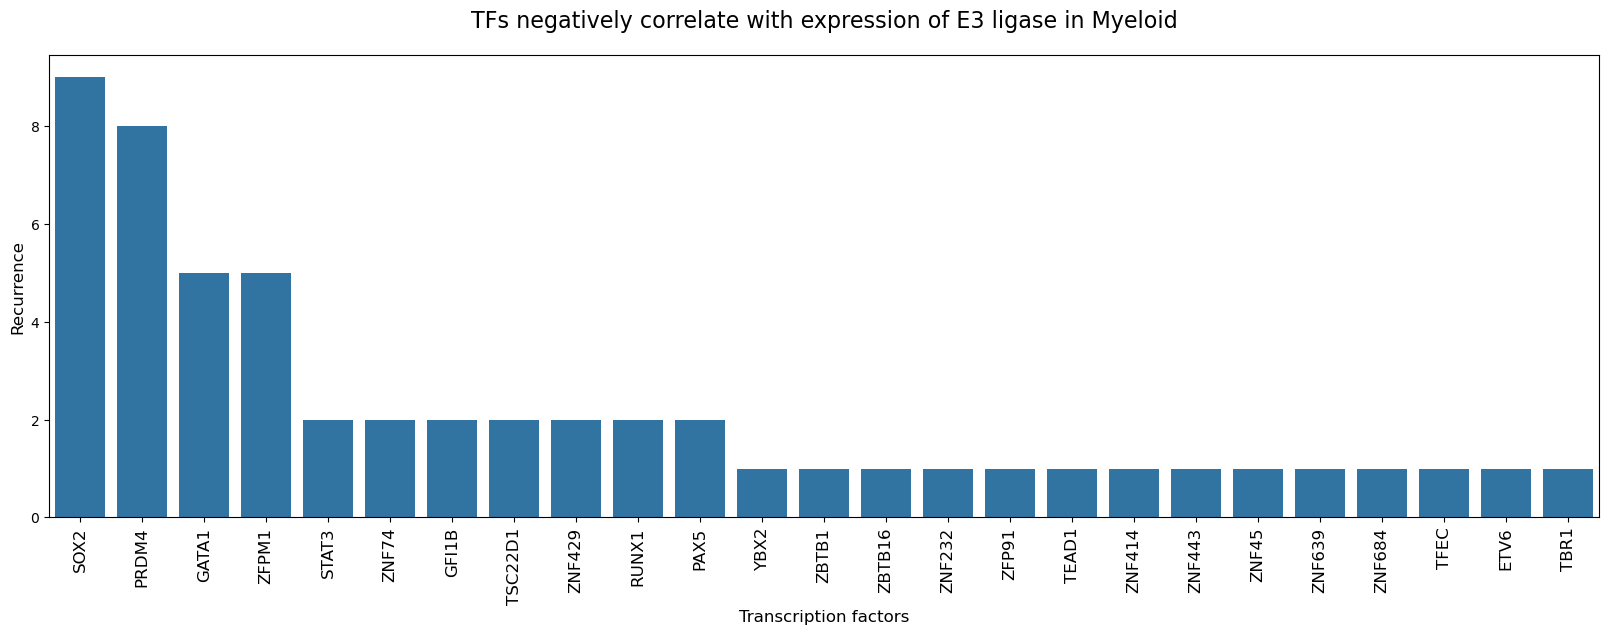

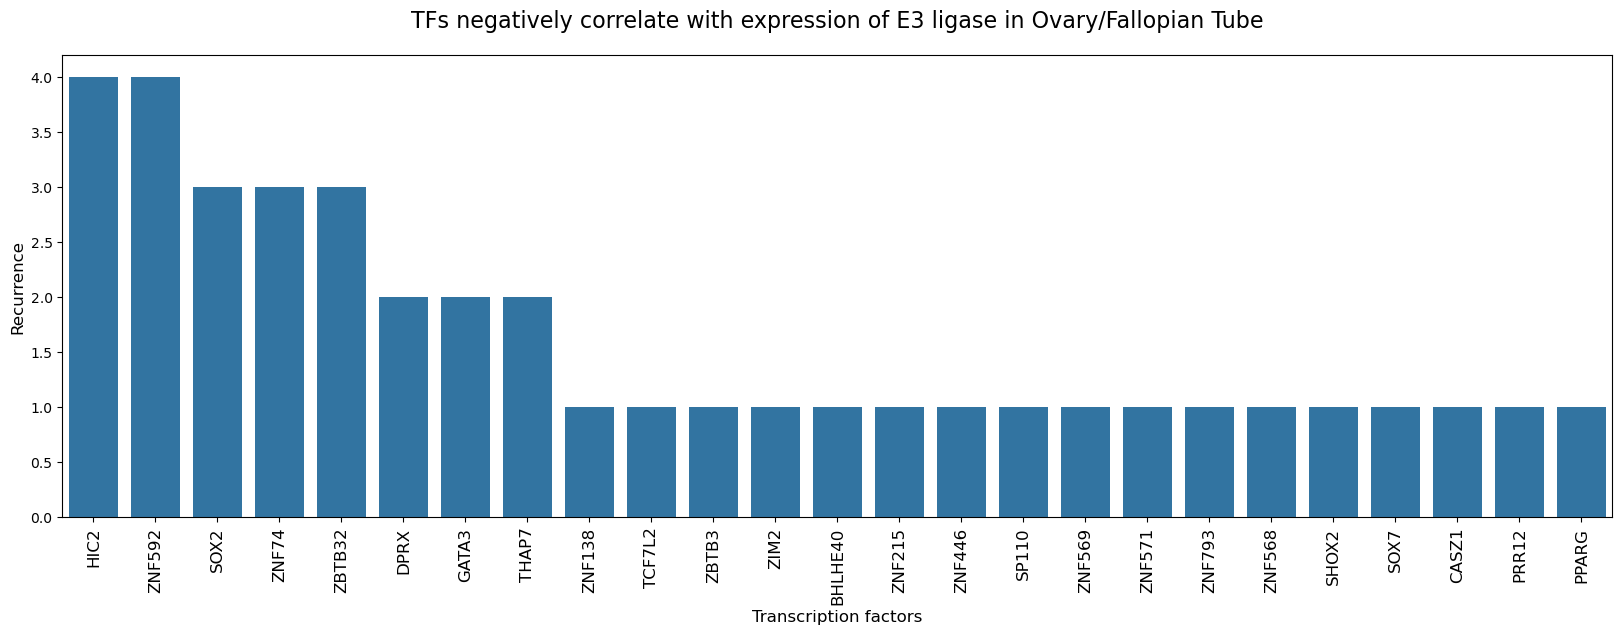

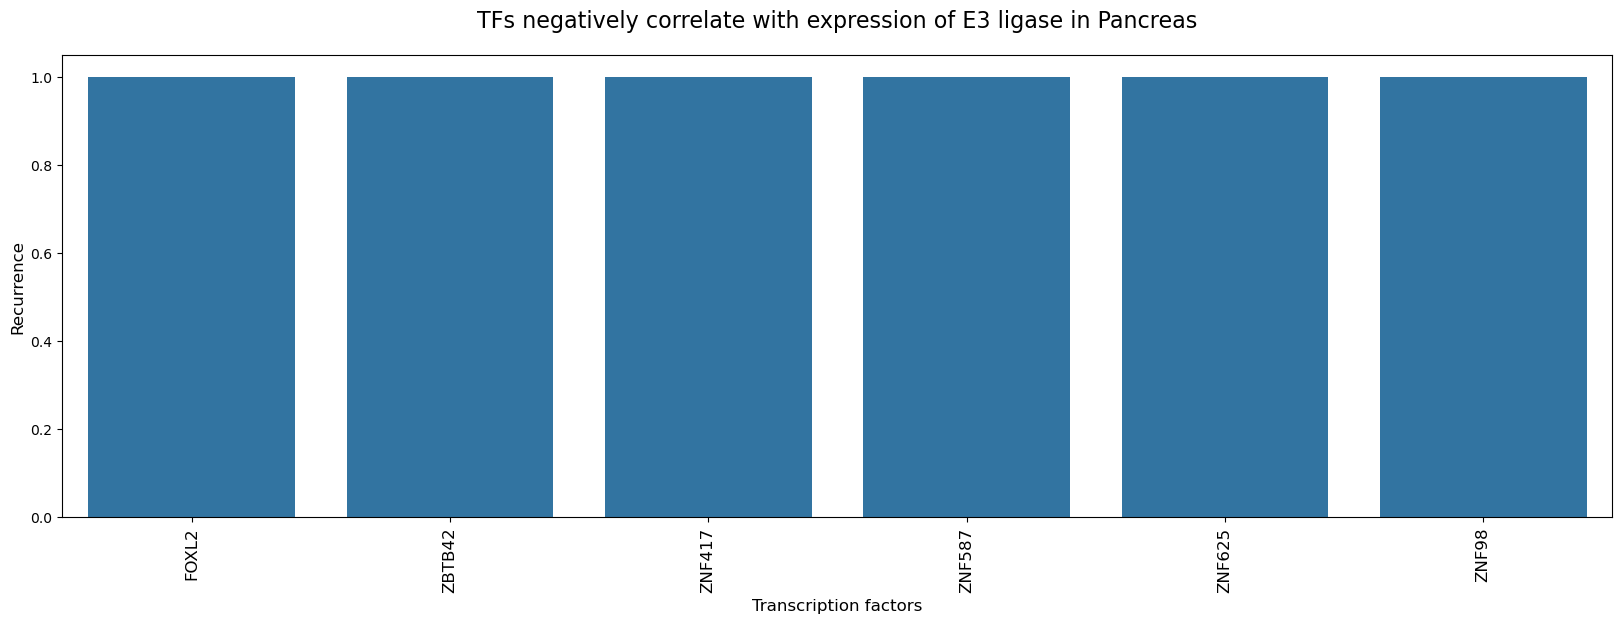

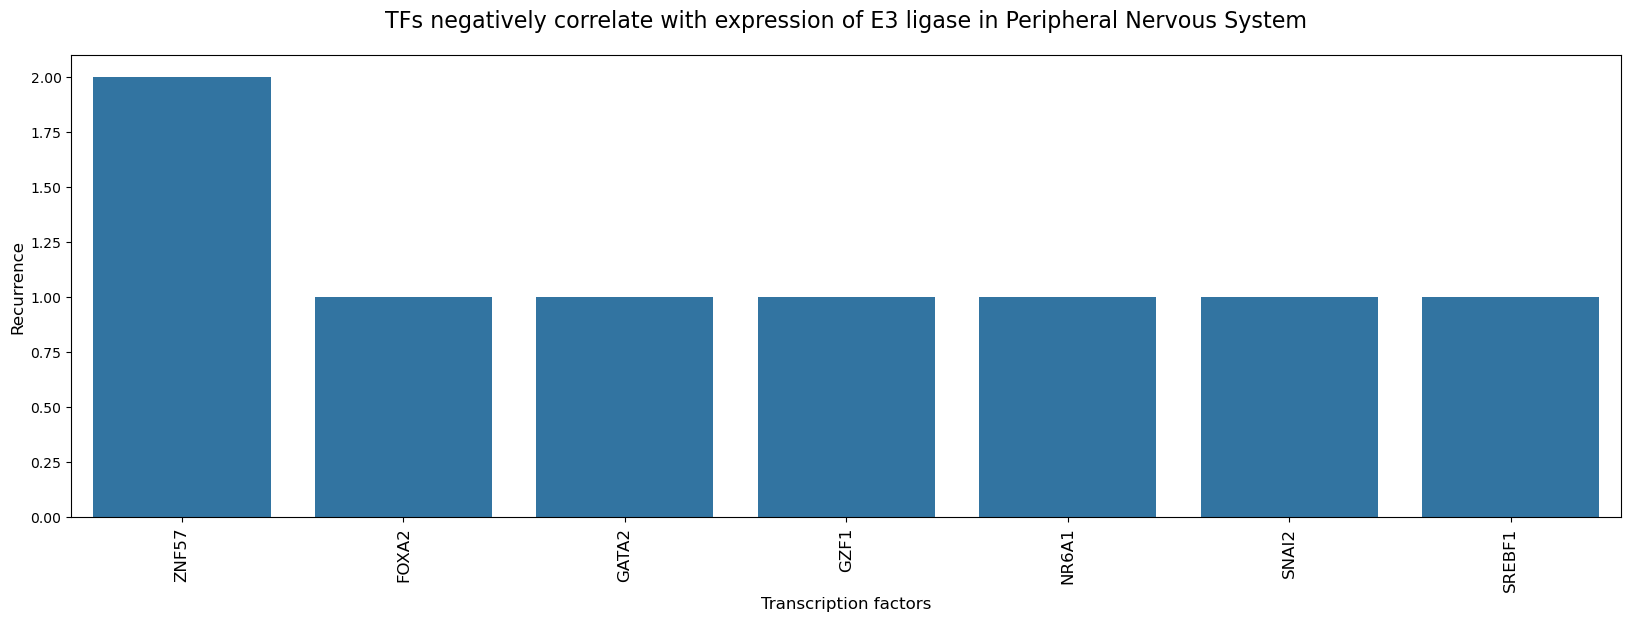

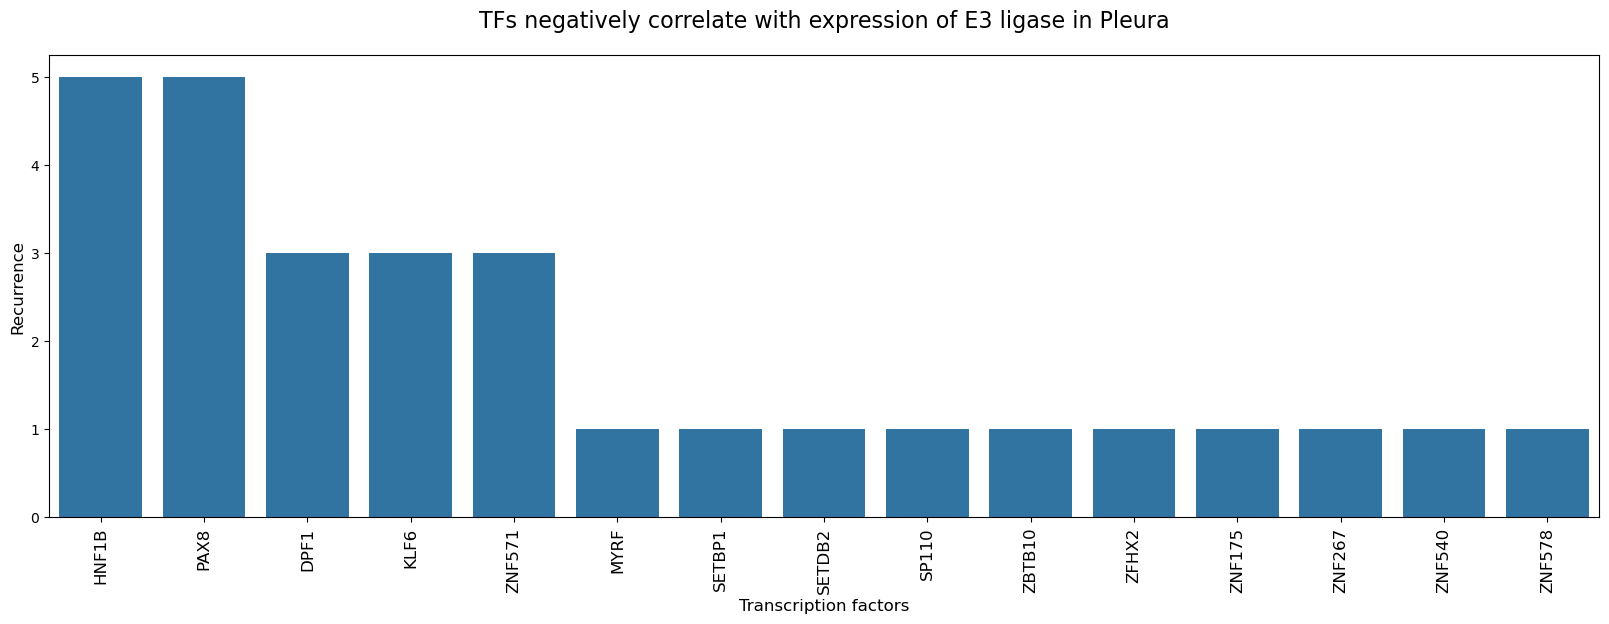

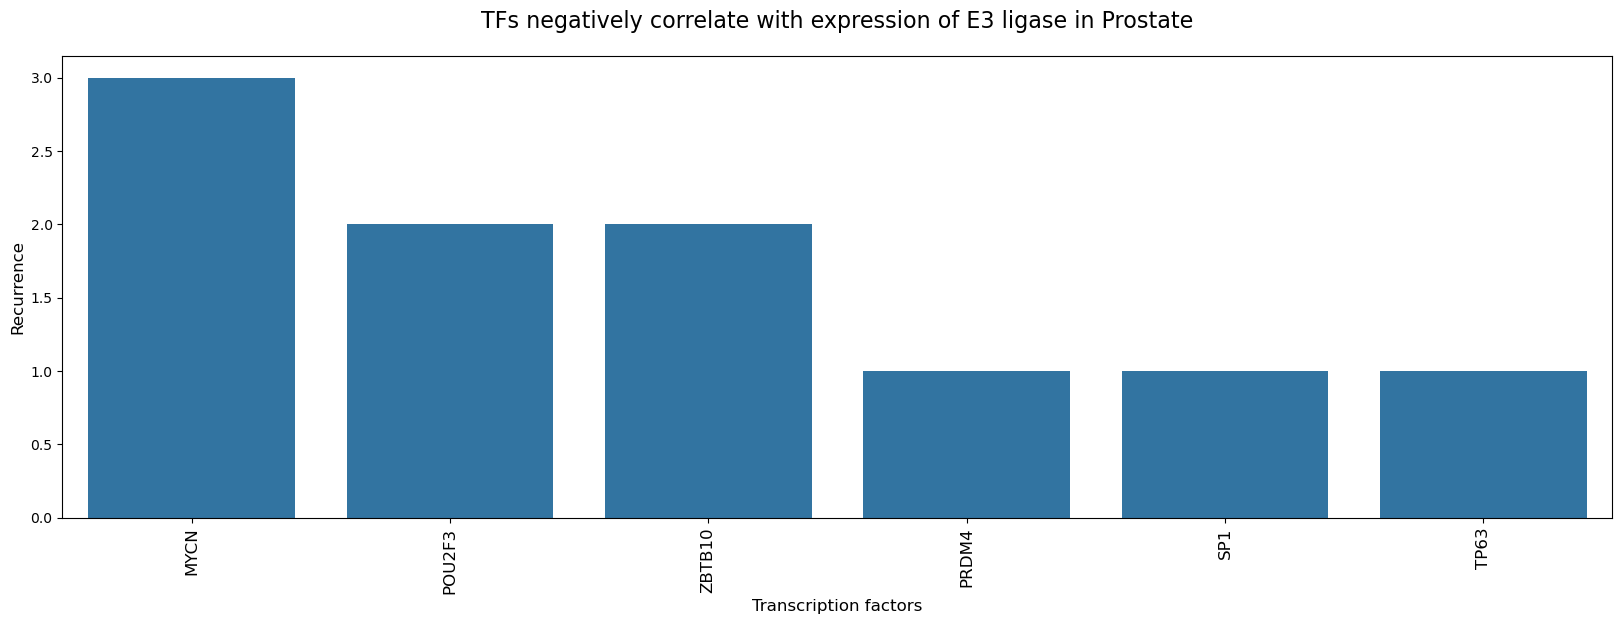

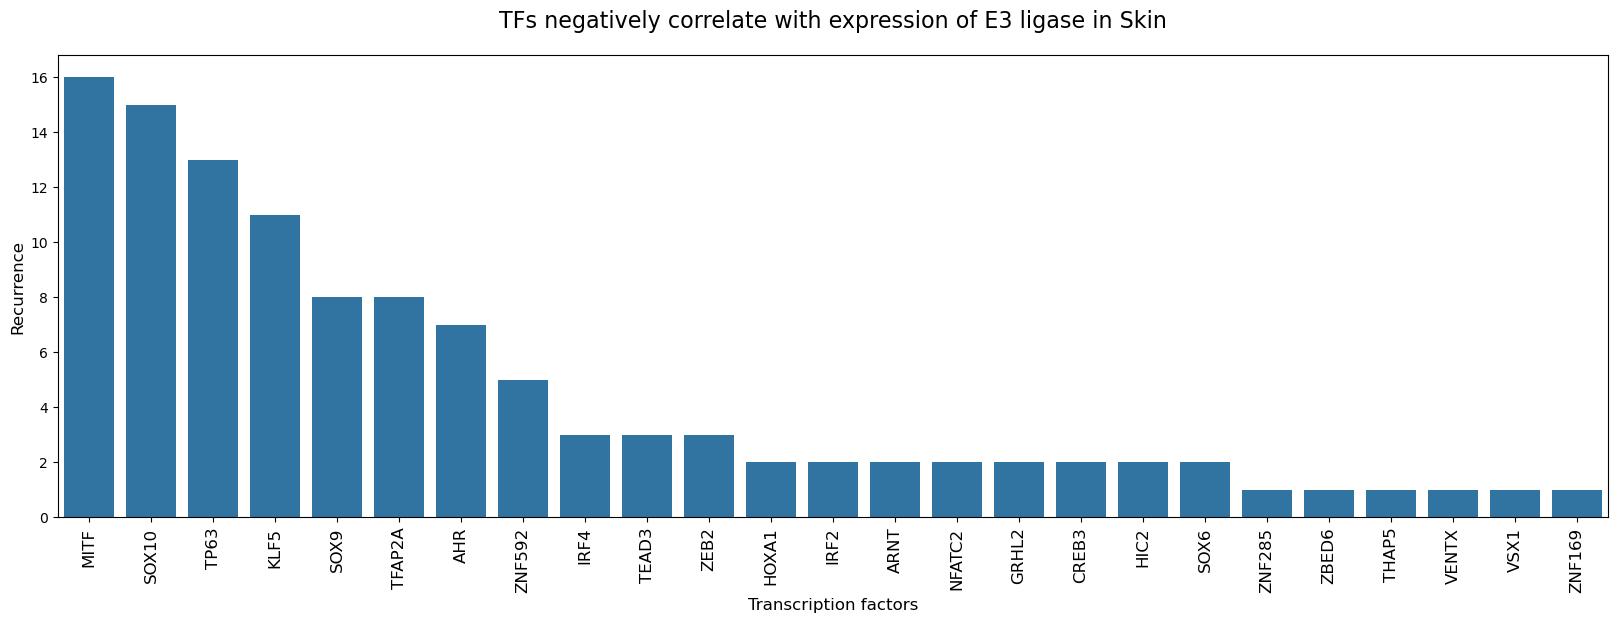

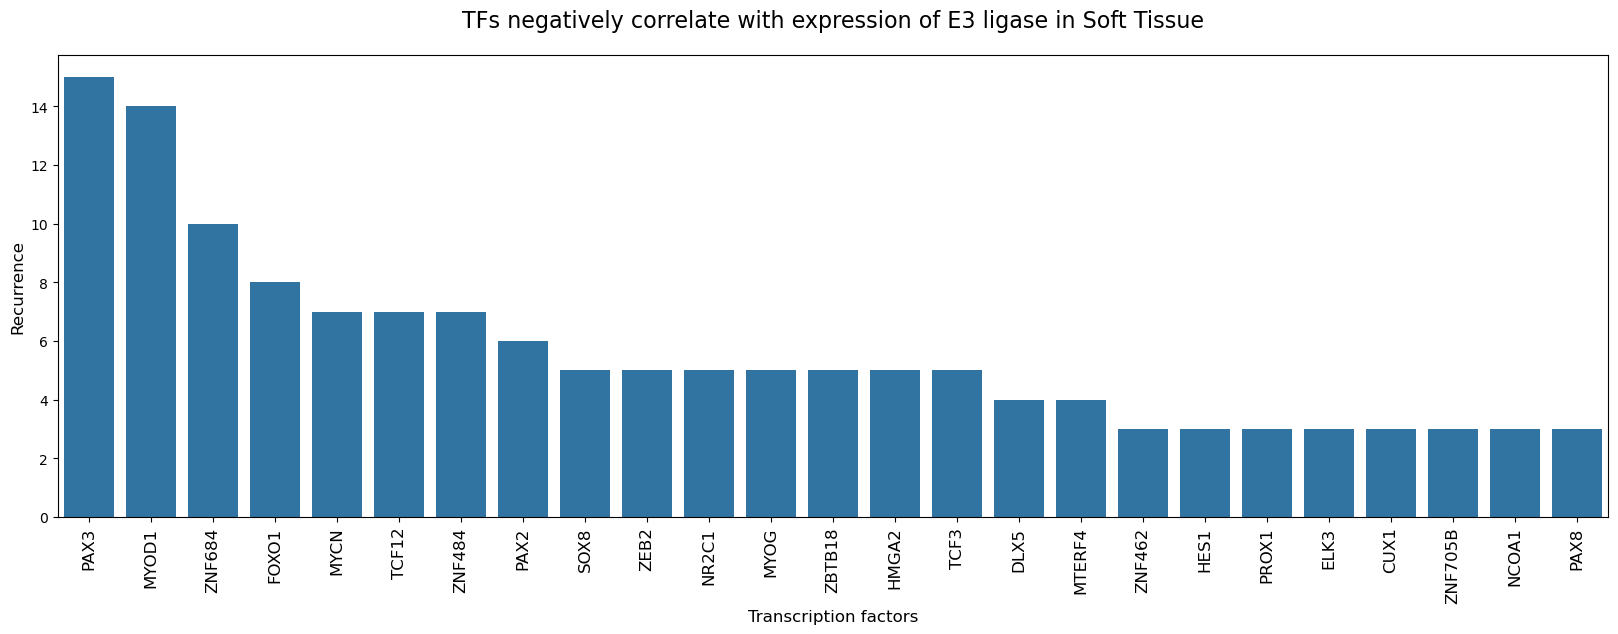

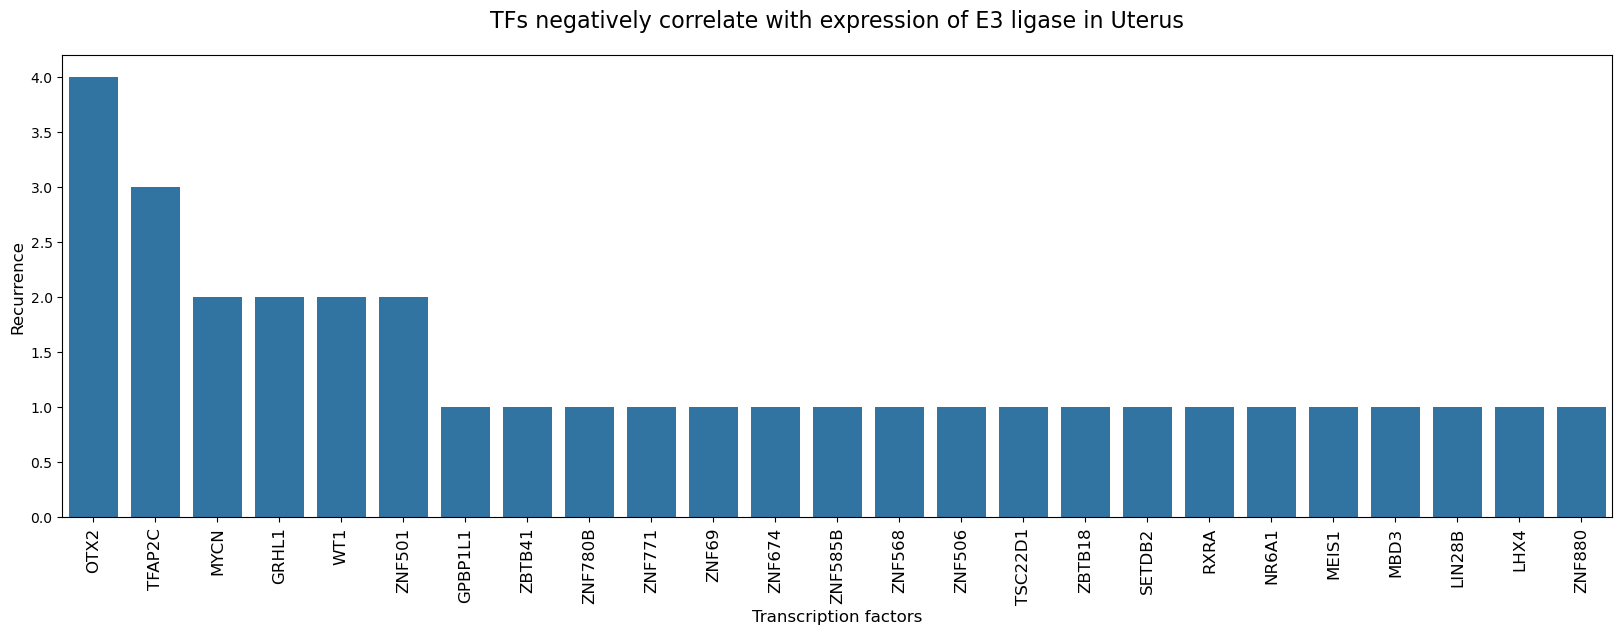

In [24]:
for lineage in tf_e3_corrs_fdrs_filtered['lineage'].unique(): 
    
    l_corr_f = tf_e3_corrs_fdrs_filtered.loc[tf_e3_corrs_fdrs_filtered['lineage'] == lineage,:]
    
    l_corr_f_count = l_corr_f.groupby('TF').nunique()
    
    l_corr_f_count_2 = pd.DataFrame(l_corr_f_count['corr'])
    
    l_corr_f_count_3=pd.DataFrame(l_corr_f_count_2.sort_values(by='corr',ascending=False)).reset_index()
    

    plt.figure(figsize = (20,6))
    
    sns.barplot(l_corr_f_count_3.head(25), x='TF', y= 'corr')

    plt.title(f'TFs negatively correlate with expression of E3 ligase in {lineage}', loc='center', fontsize=16, pad=20)
    plt.ylabel('Recurrence', fontsize=12)
    plt.xlabel('Transcription factors', fontsize=12)
    #plt.gca().set_xticklabels([])
    plt.xticks(rotation = 90, fontsize = 12)
    plt.show()

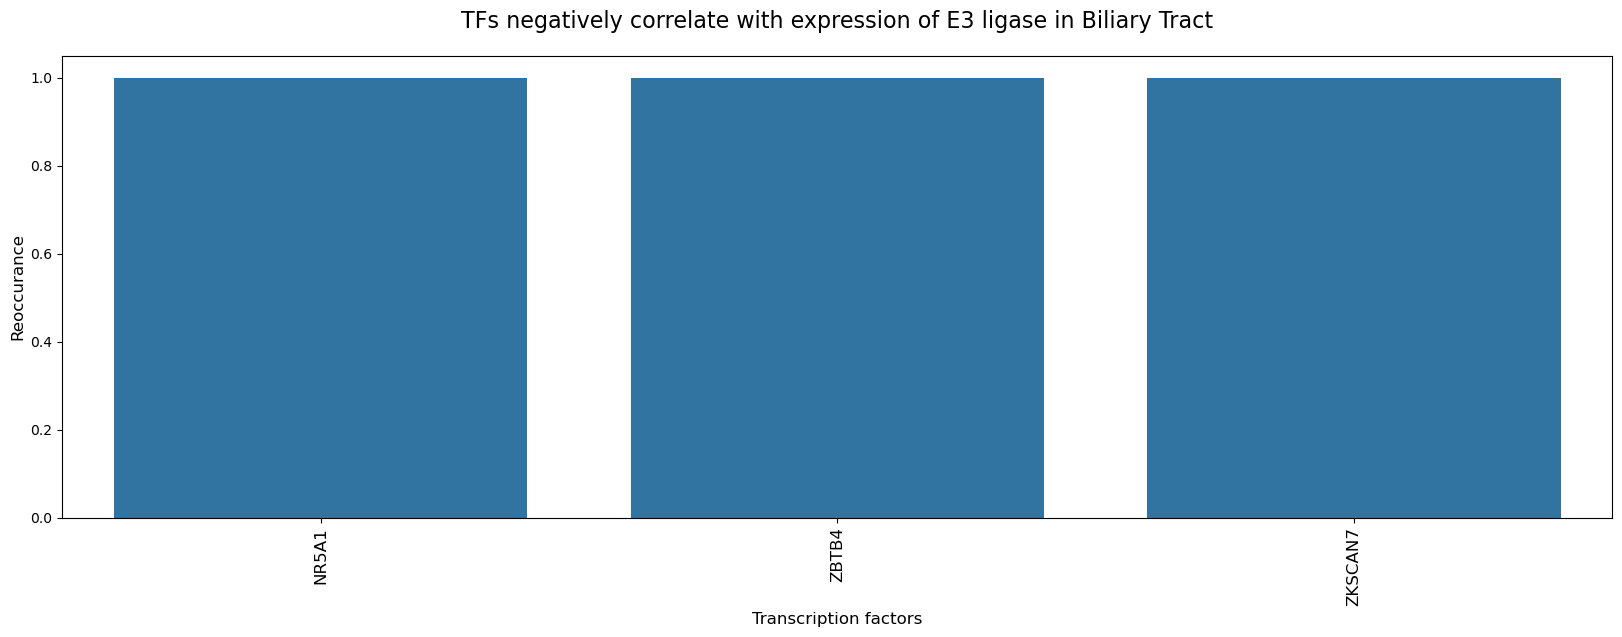

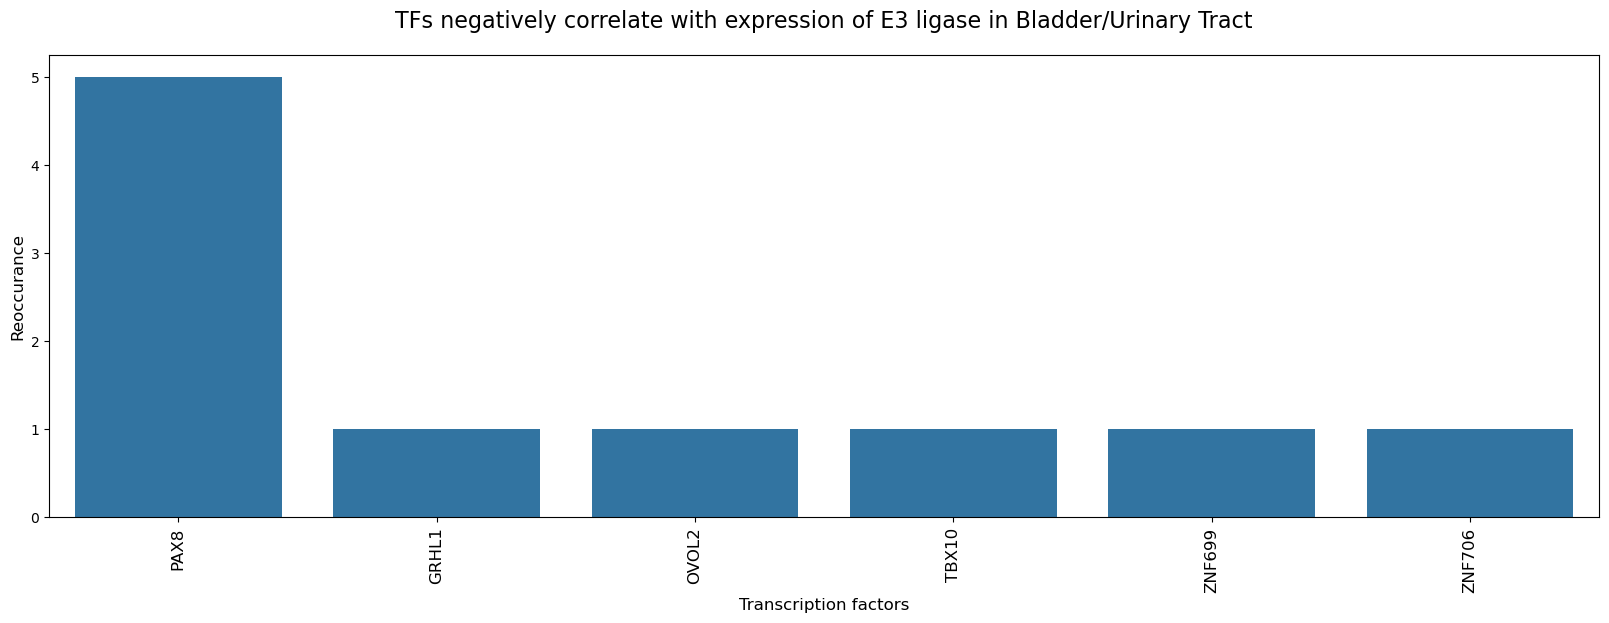

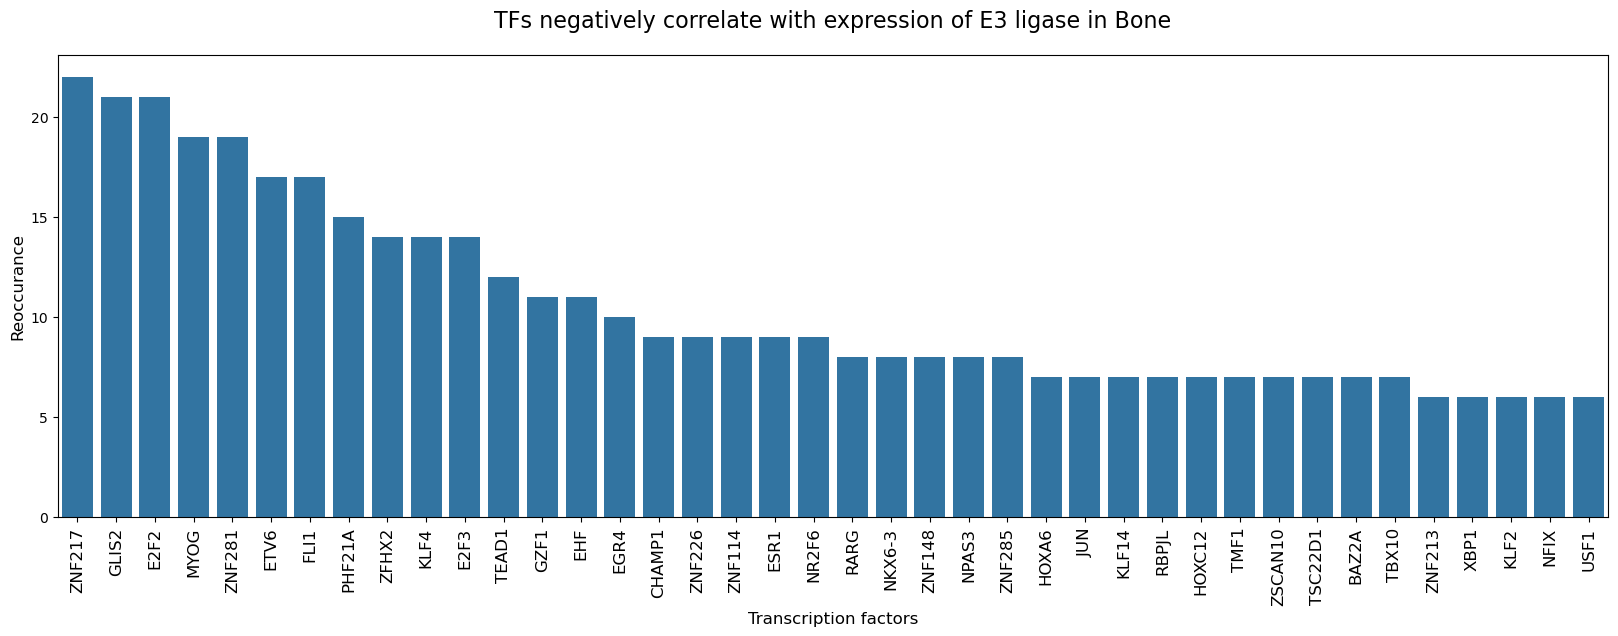

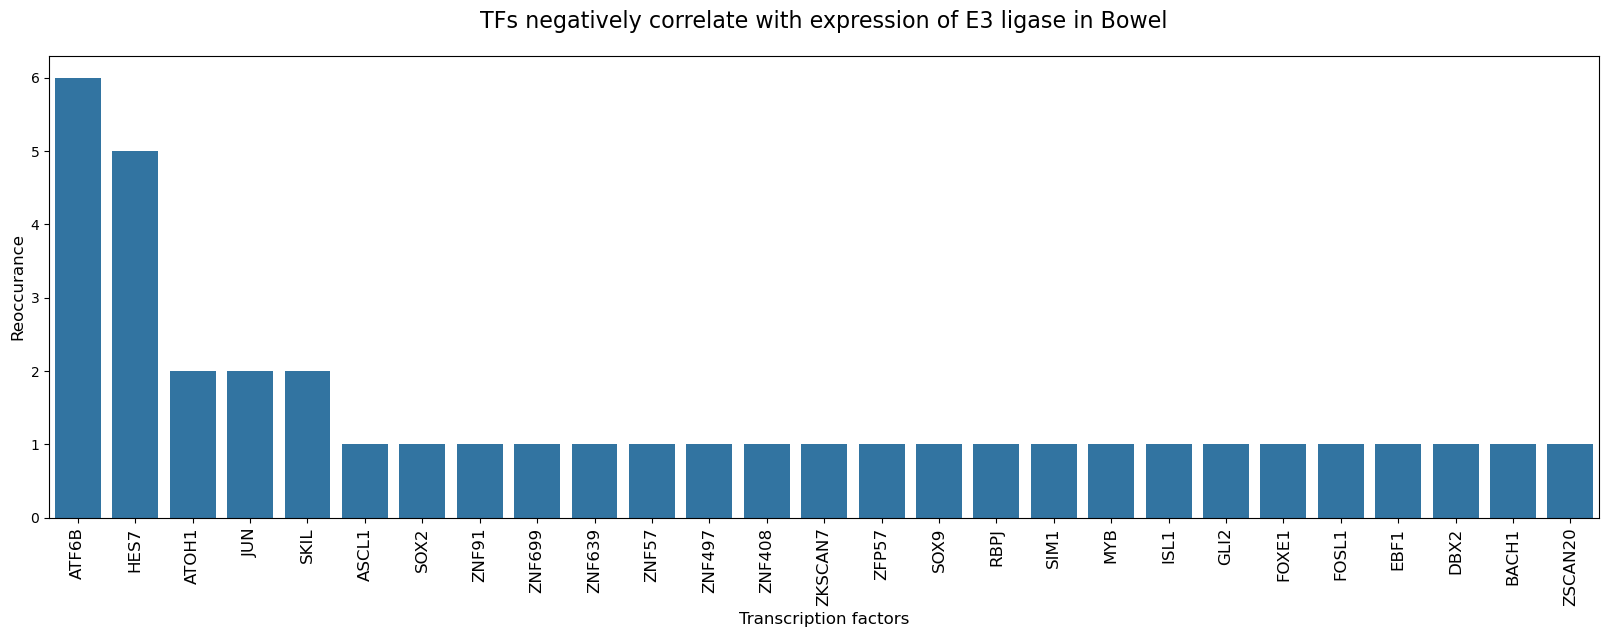

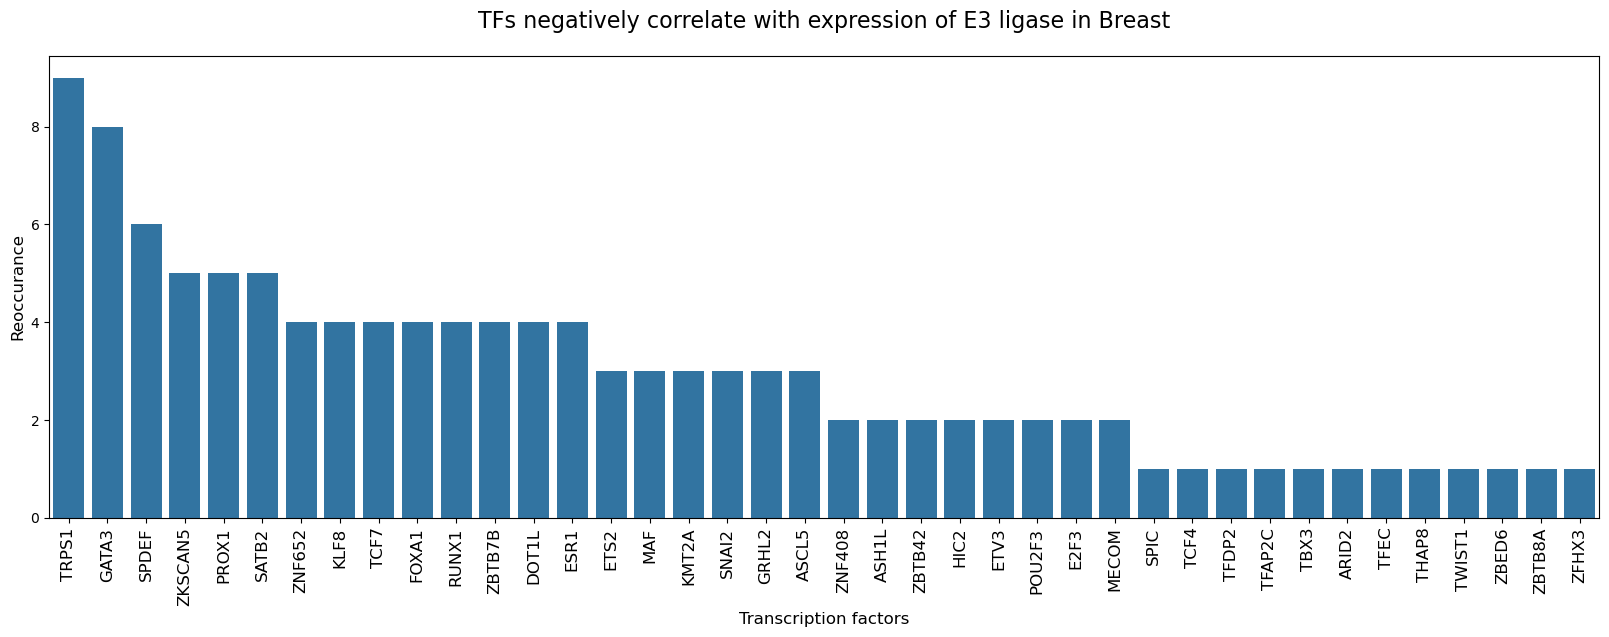

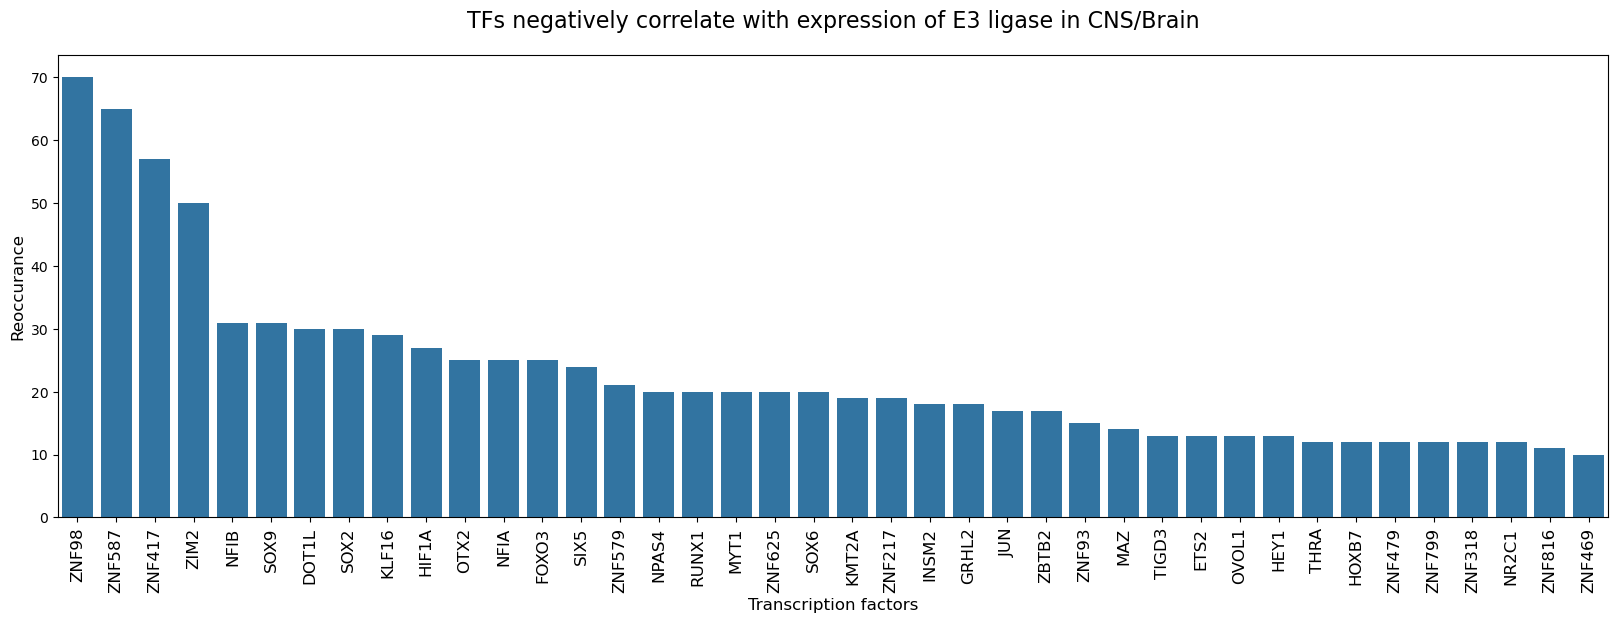

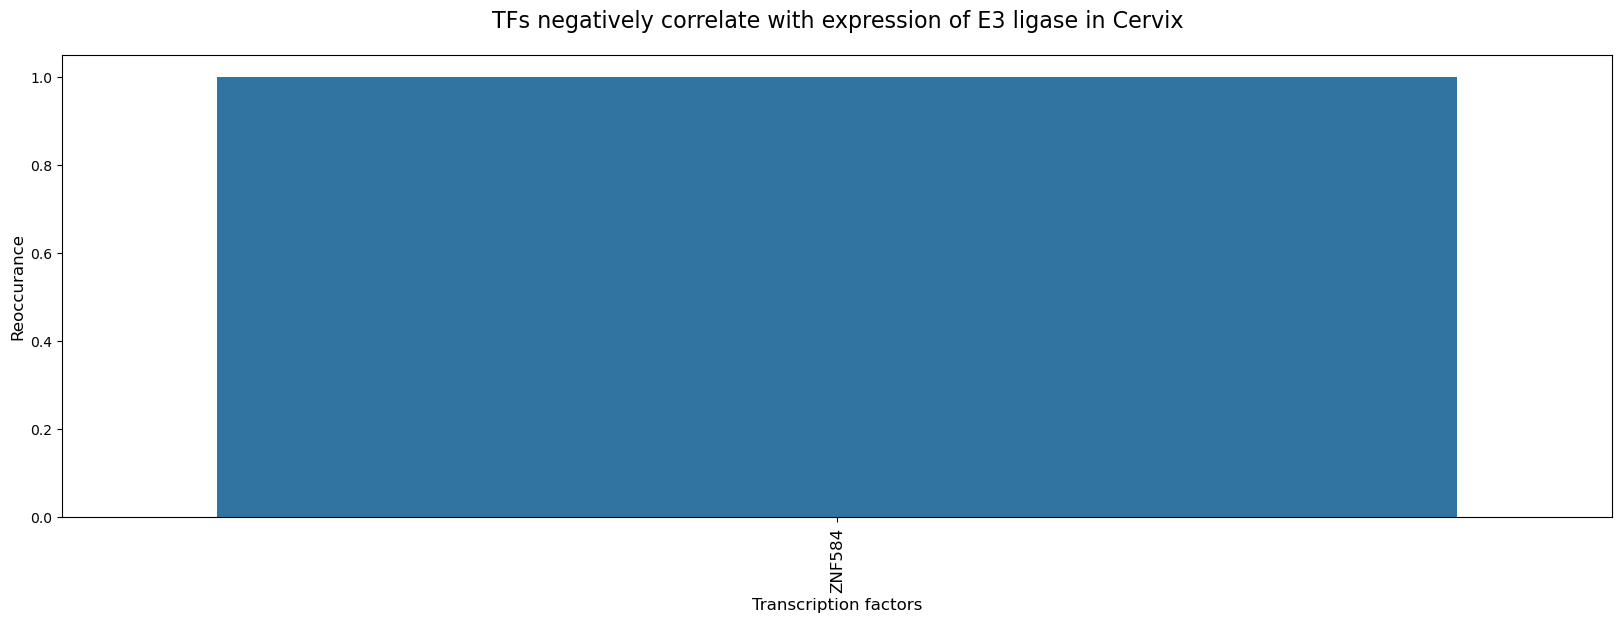

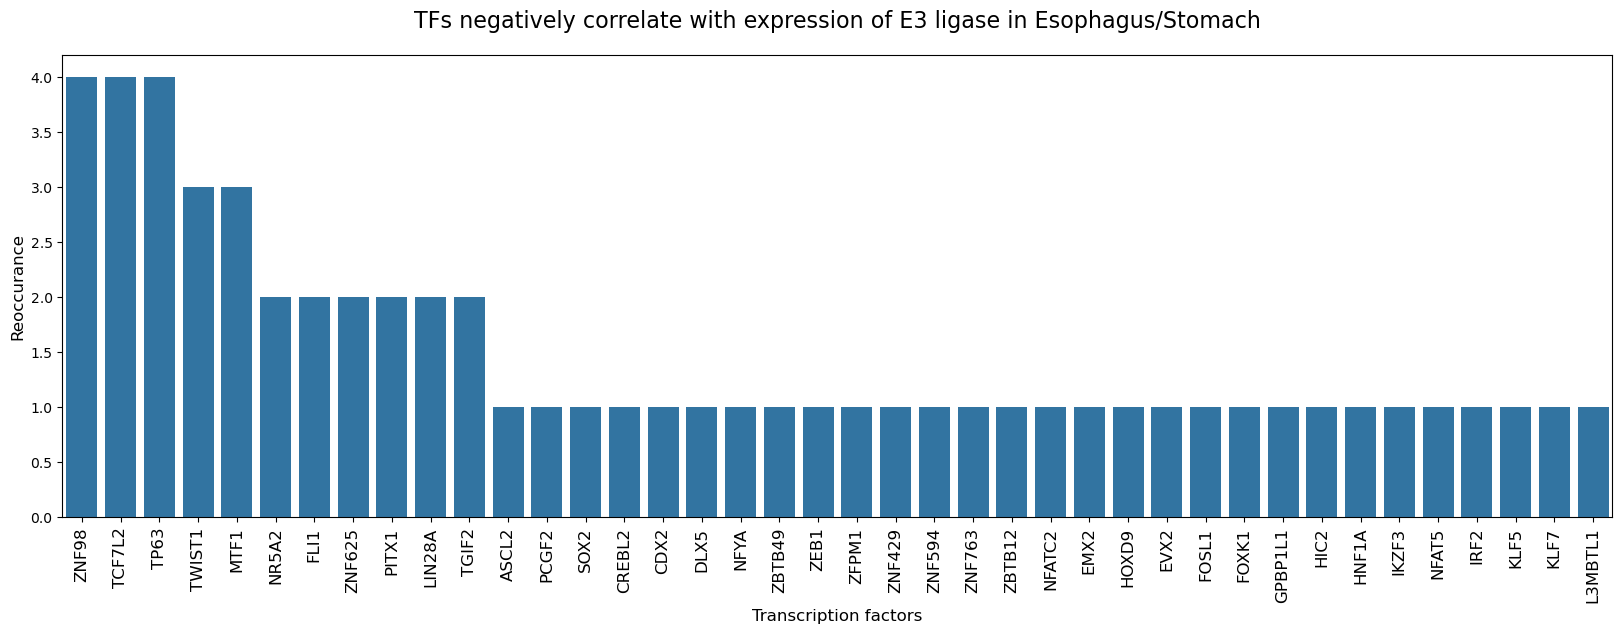

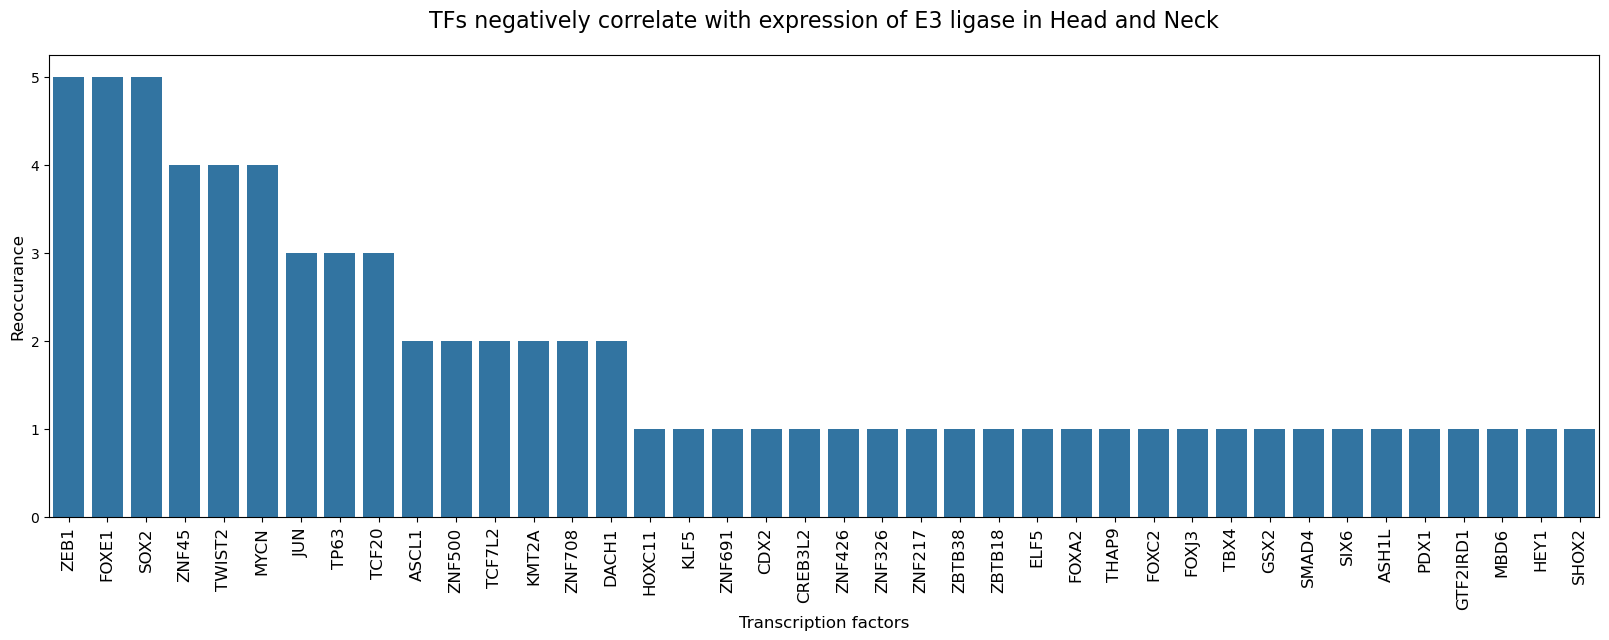

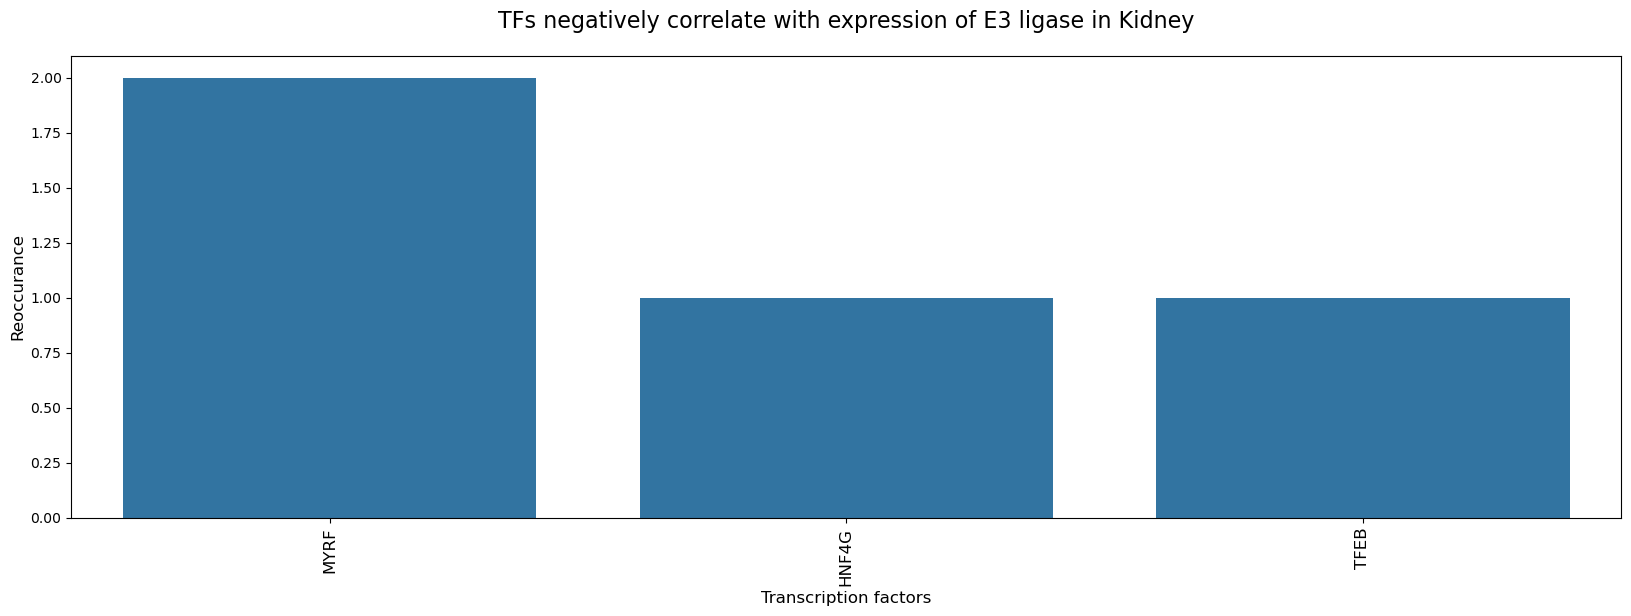

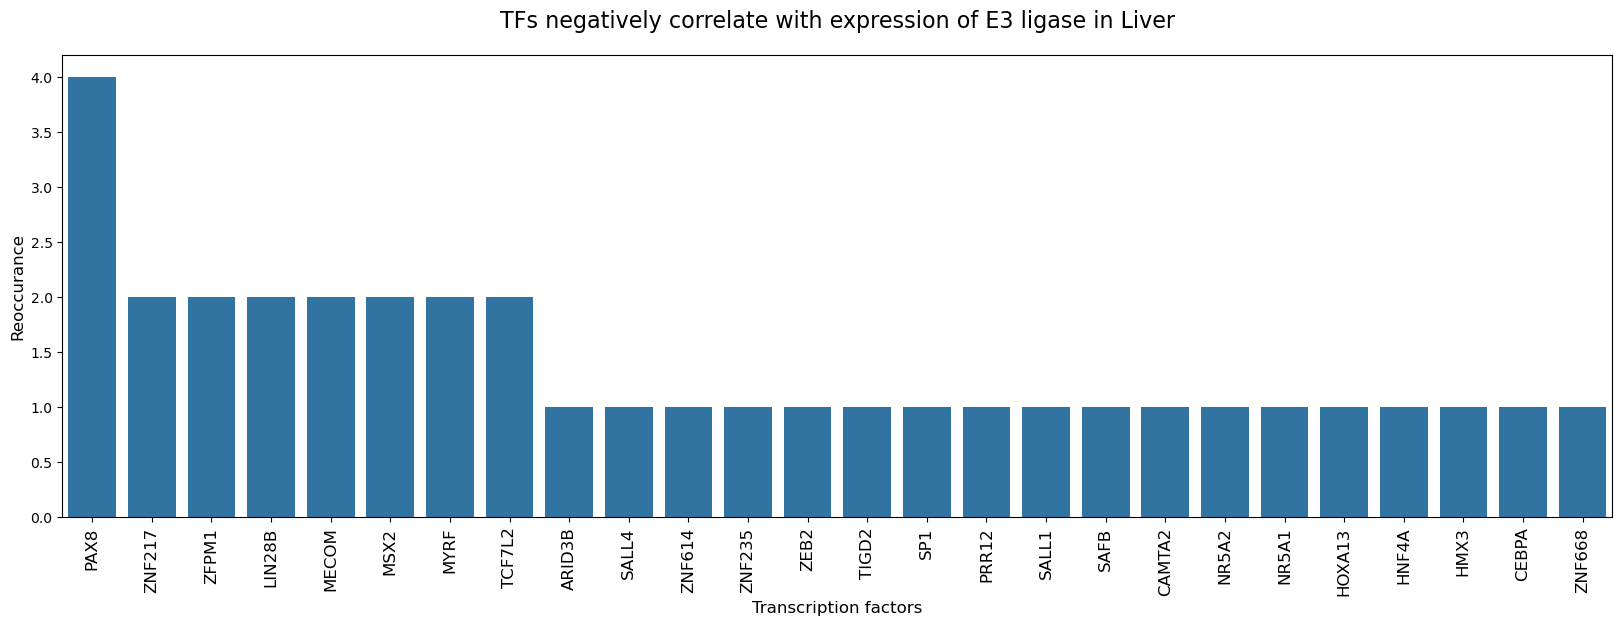

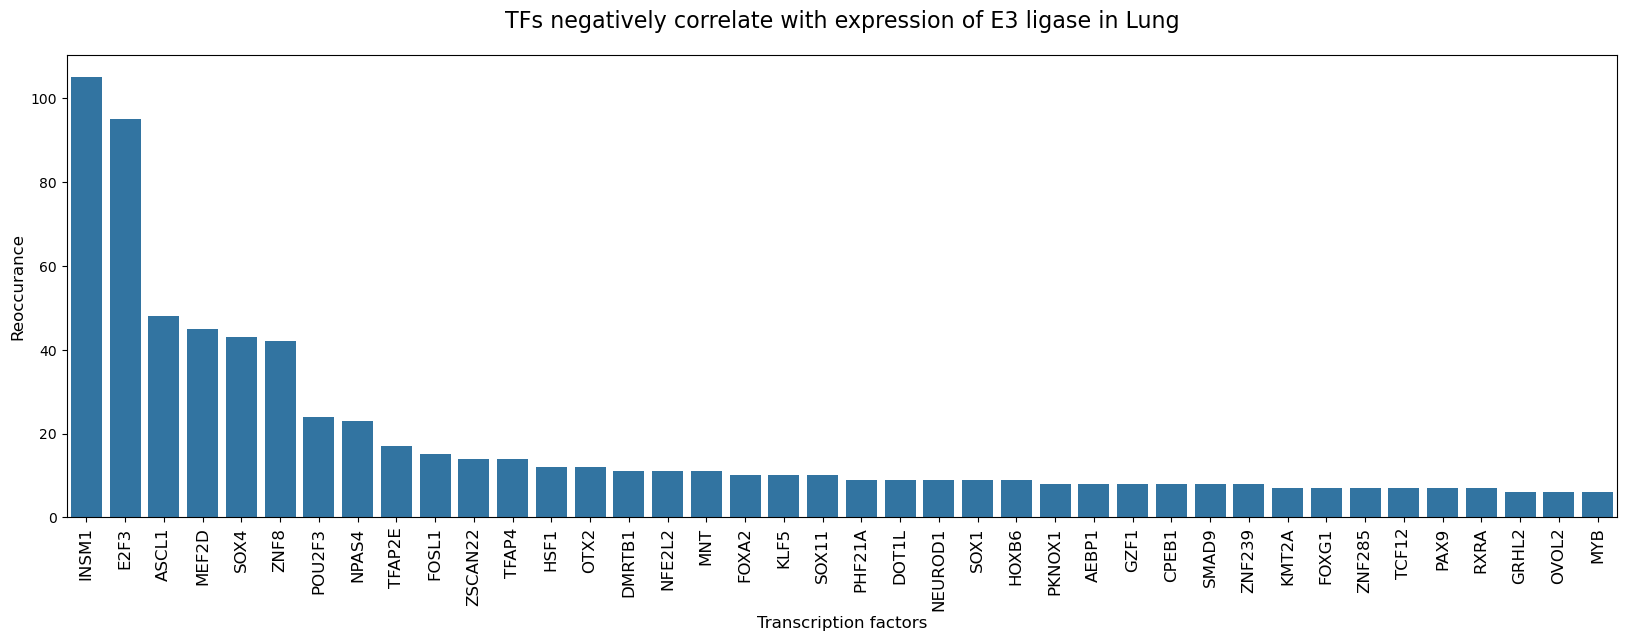

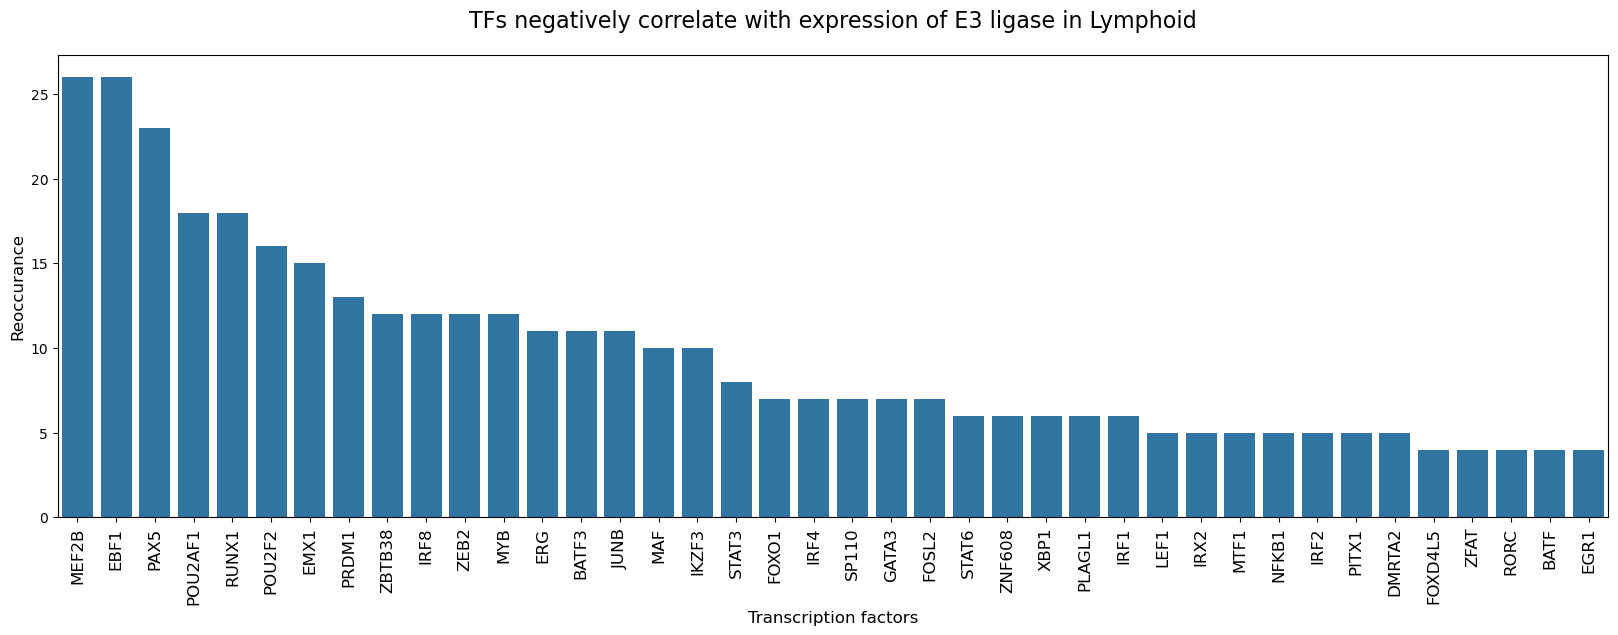

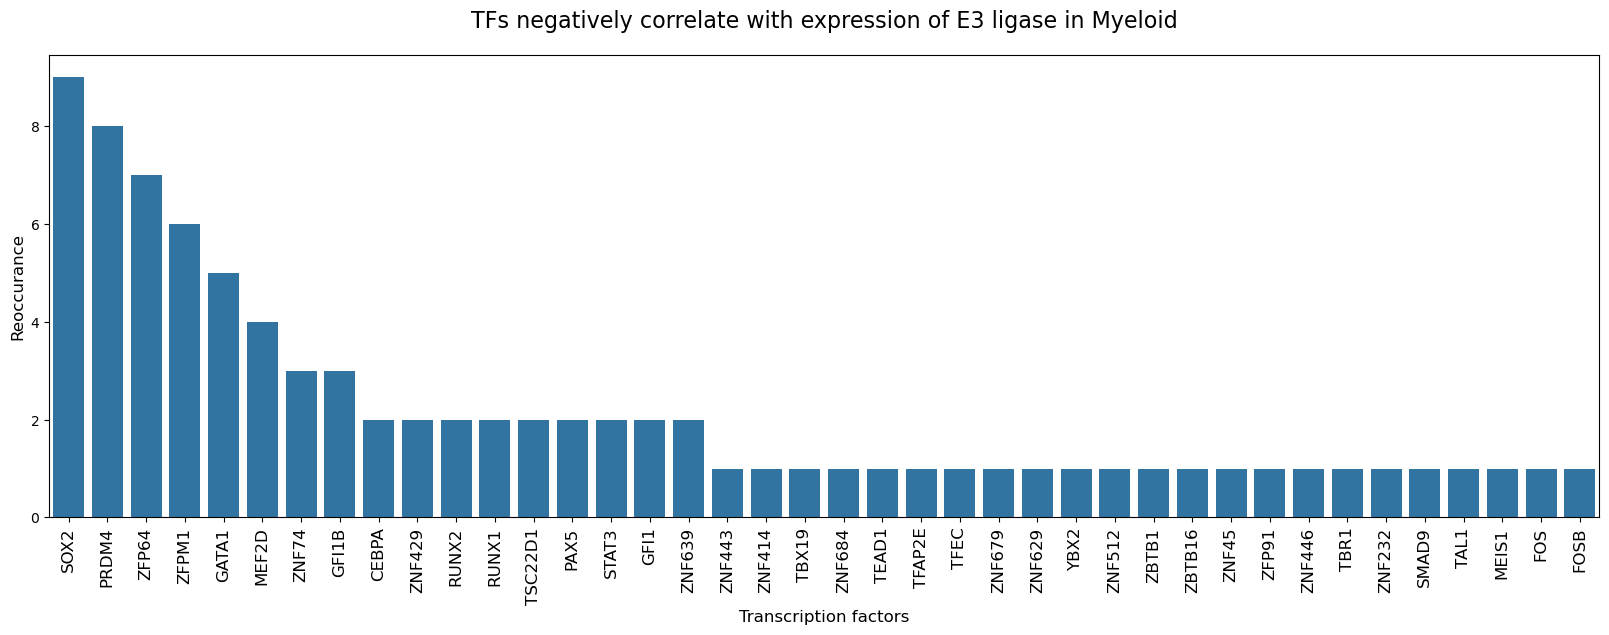

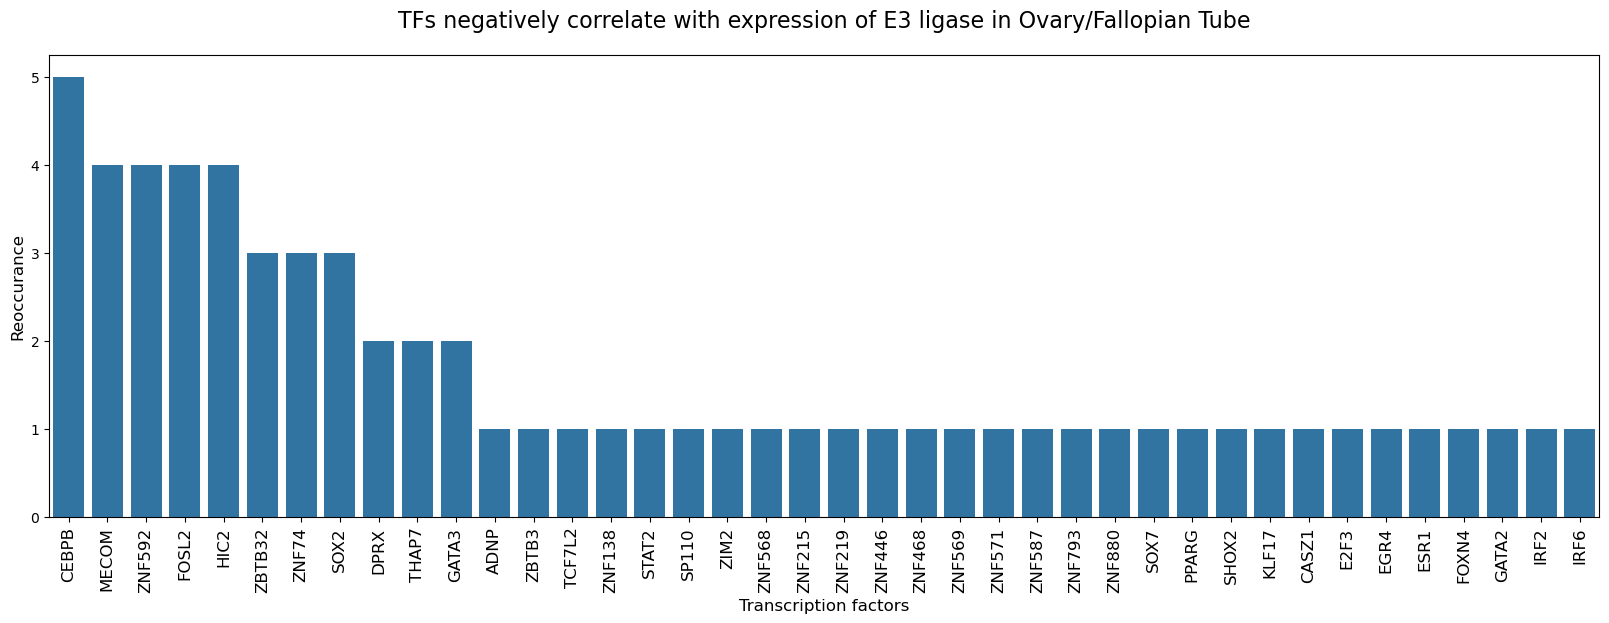

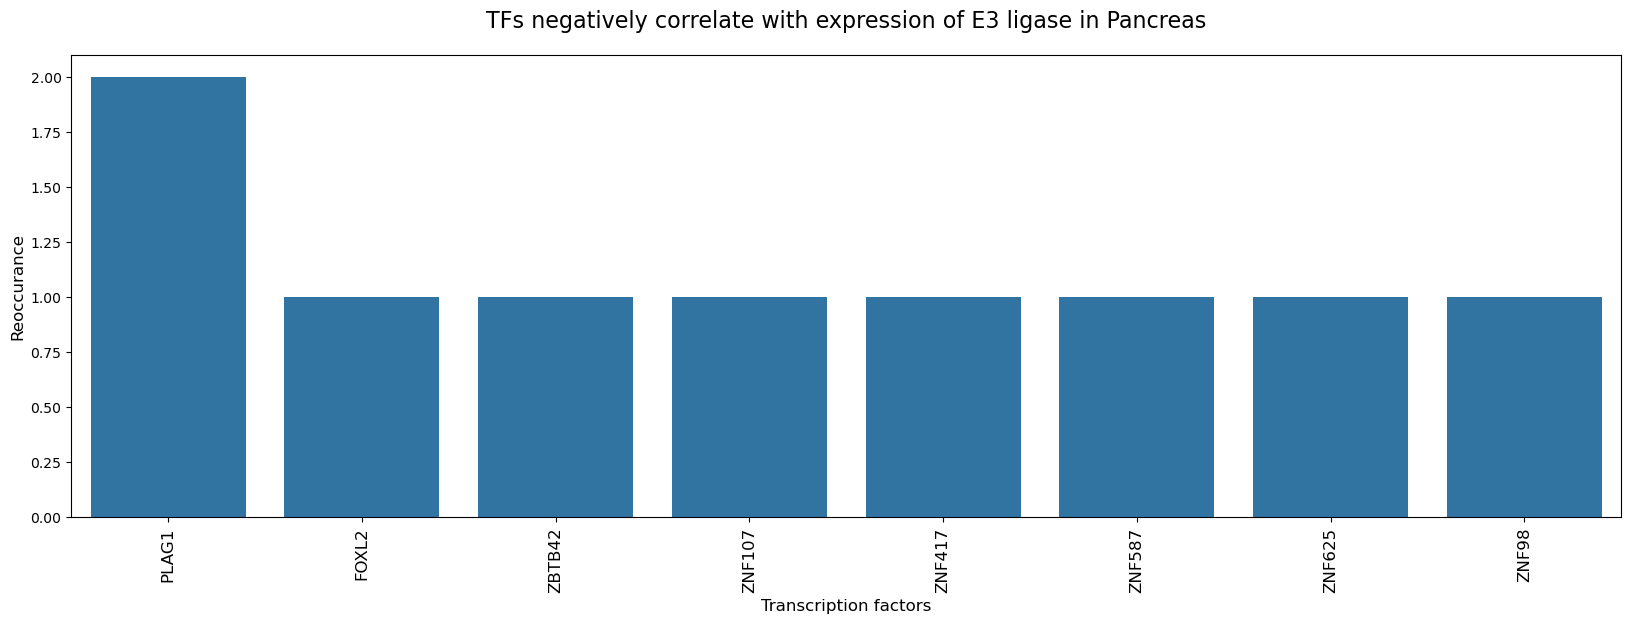

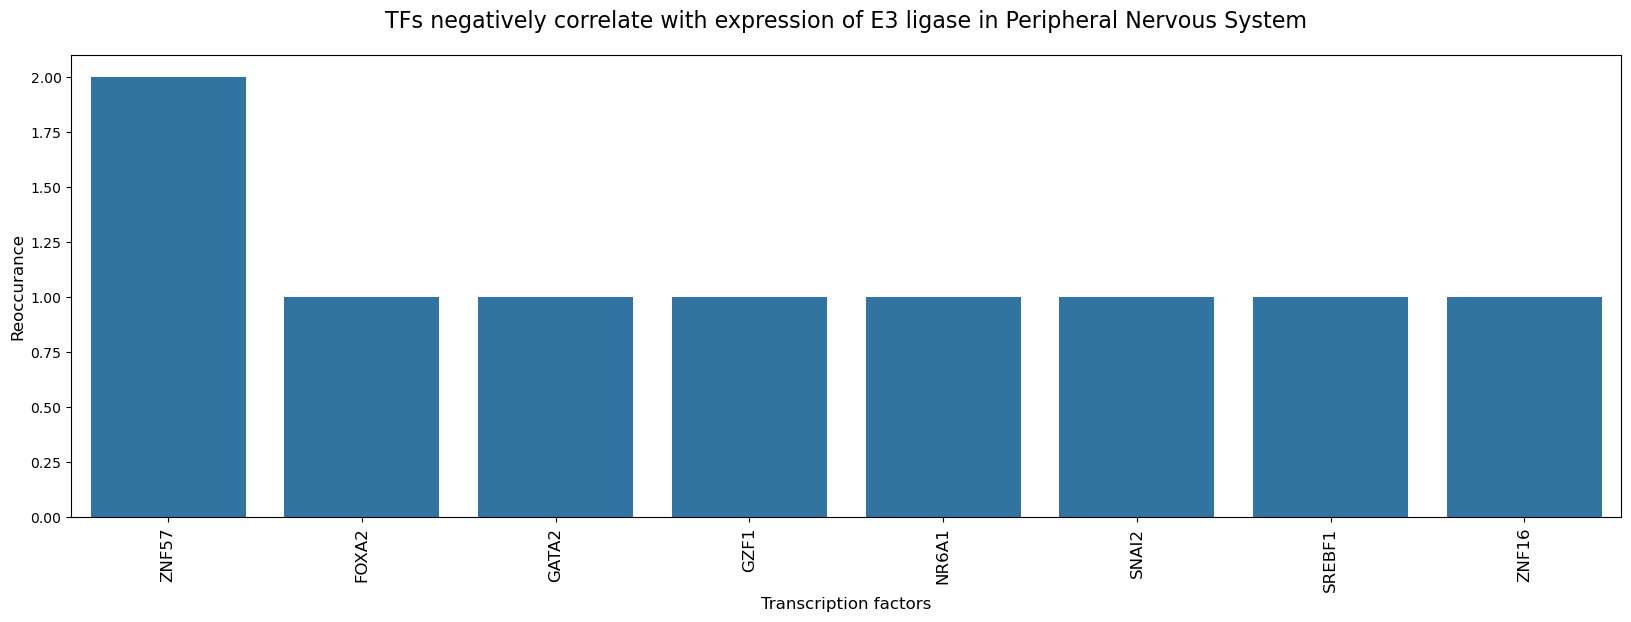

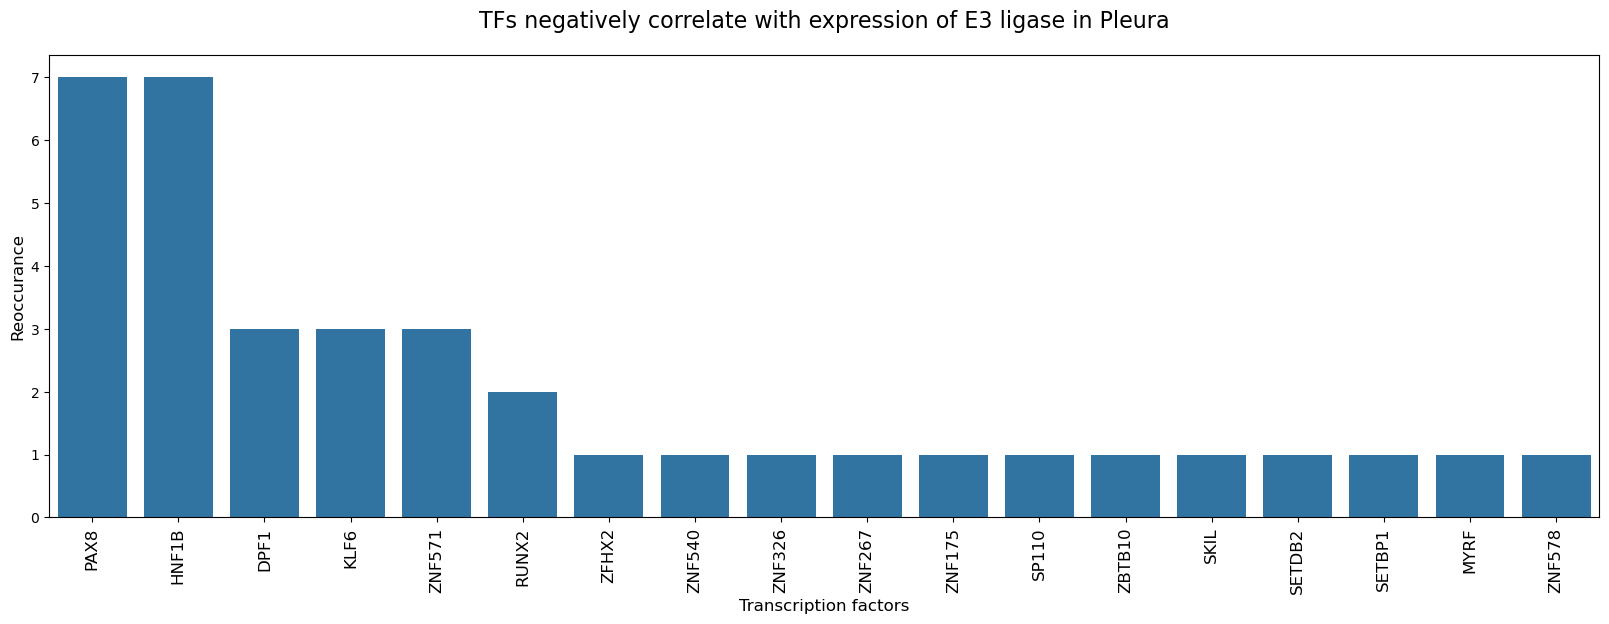

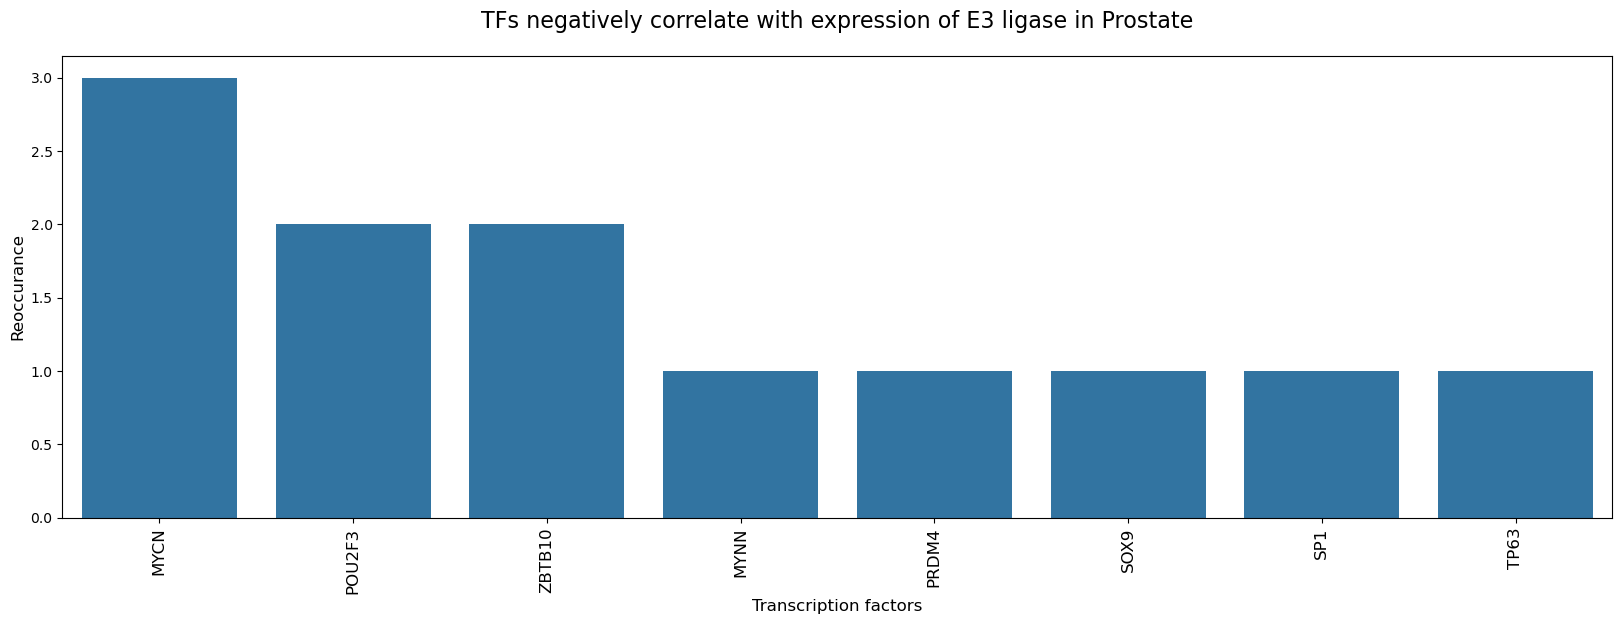

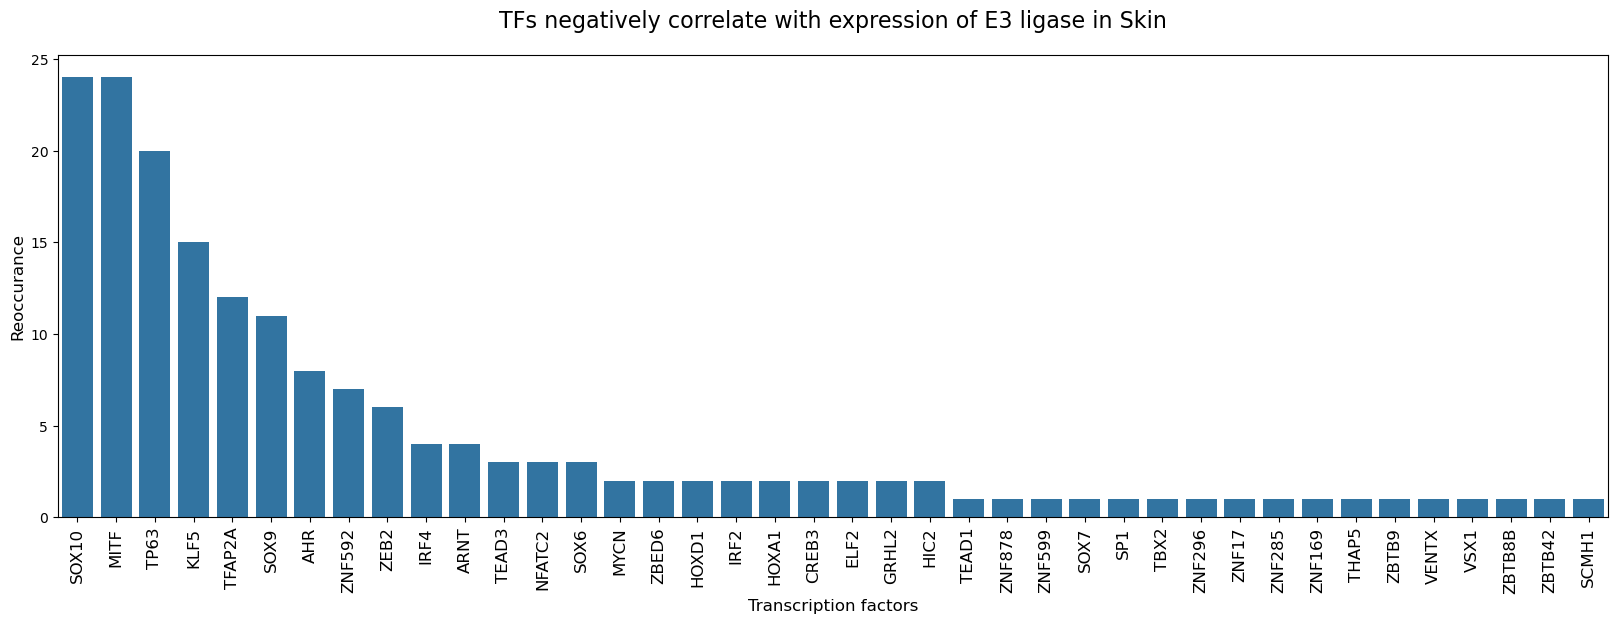

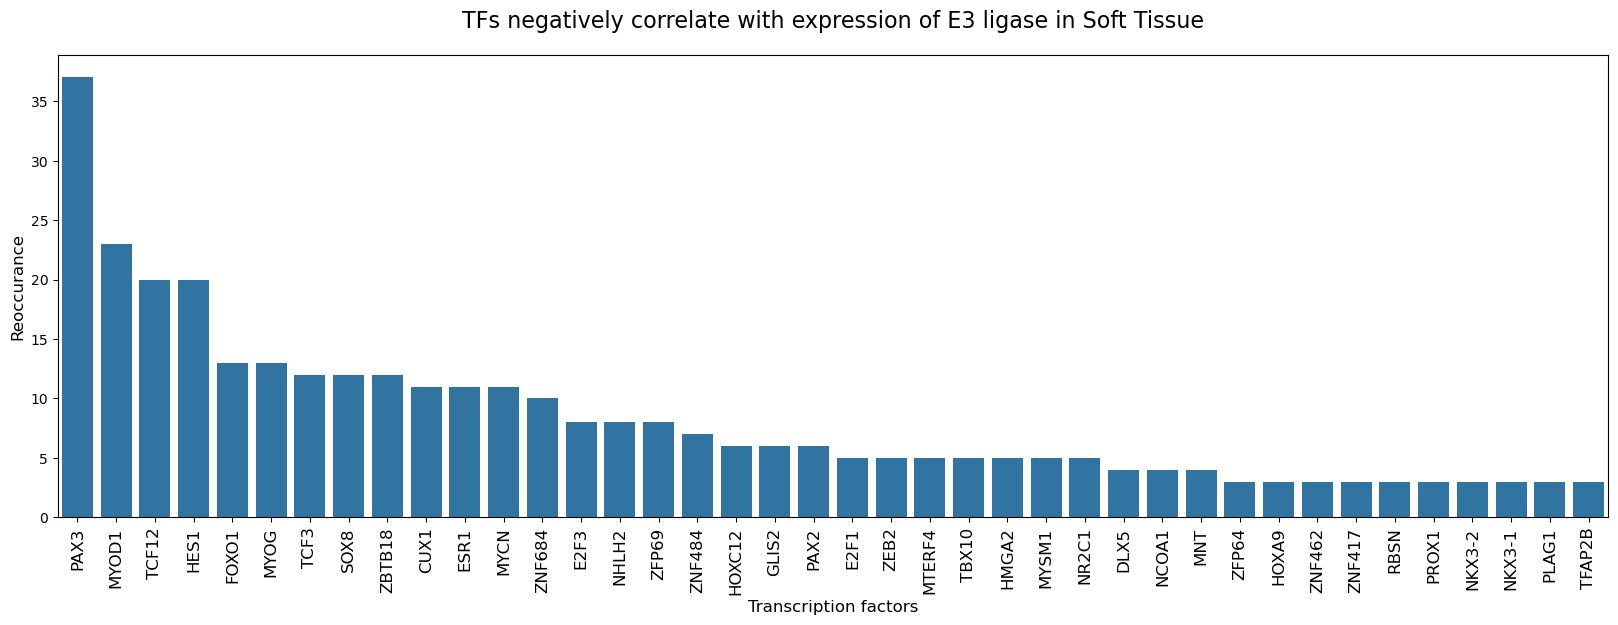

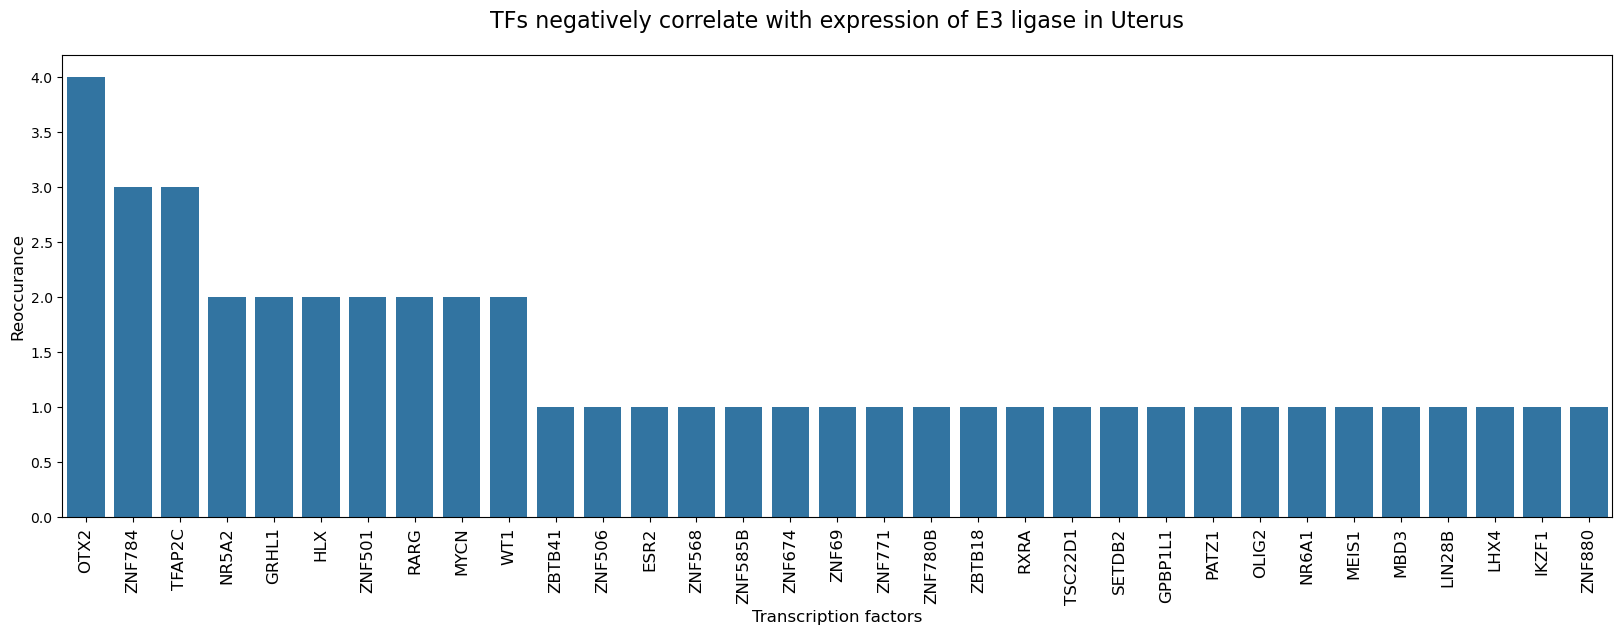

In [16]:
for lineage in tf_e3_corrs_fdrs_filtered['lineage'].unique(): 
    
    l_corr_f = tf_e3_corrs_fdrs_filtered.loc[tf_e3_corrs_fdrs_filtered['lineage'] == lineage,:]
    
    l_corr_f_count = l_corr_f.groupby('TF').nunique()
    
    l_corr_f_count_2 = pd.DataFrame(l_corr_f_count['corr'])
    
    l_corr_f_count_3=pd.DataFrame(l_corr_f_count_2.sort_values(by='corr',ascending=False)).reset_index()
    

    plt.figure(figsize = (20,6))
    
    sns.barplot(l_corr_f_count_3.head(40), x='TF', y= 'corr')

    plt.title(f'TFs negatively correlate with expression of E3 ligase in {lineage}', loc='center', fontsize=16, pad=20)
    plt.ylabel('Reoccurance', fontsize=12)
    plt.xlabel('Transcription factors', fontsize=12)
    #plt.gca().set_xticklabels([])
    plt.xticks(rotation = 90, fontsize = 12)
    plt.show()